In [1]:
from utils.indicators import add_indicators
from utils.data_loader import fetch_data_yf, fetch_multiple_yf
from utils.preprocessing import preprocess_flat

In [94]:
tickers = ["TLKM.JK","BBCA.JK", "BBNI.JK", "BBRI.JK"]
tickers_lq45 = [
    "ACES.JK", # Ace Hardware Indonesia Tbk.
    "ADRO.JK", # Adaro Energy Indonesia Tbk.
    "AKRA.JK", # AKR Corporindo Tbk.
    "AMMN.JK", # Amman Mineral Internasional Tbk.
    "ARTO.JK", # Bank Jago Tbk.
    "ASII.JK", # Astra International Tbk.
    "BBCA.JK", # Bank Central Asia Tbk.
    "BBNI.JK", # Bank Negara Indonesia (Persero) Tbk.
    "BBRI.JK", # Bank Rakyat Indonesia (Persero) Tbk.
    "BMRI.JK", # Bank Mandiri (Persero) Tbk.
    "BRIS.JK", # Bank Syariah Indonesia Tbk.
    "BRPT.JK", # Barito Pacific Tbk.
    "BUKA.JK", # Bukalapak.com Tbk.
    "CPIN.JK", # Charoen Pokphand Indonesia Tbk.
    "EMTK.JK", # Elang Mahkota Teknologi Tbk.
    "ESSA.JK", # ESSA Industries Indonesia Tbk.
    "EXCL.JK", # XL Axiata Tbk.
    "GOTO.JK", # GoTo Gojek Tokopedia Tbk.
    "GGRM.JK", # Gudang Garam Tbk.
    "HRUM.JK", # Harum Energy Tbk.
    "HMSP.JK", # H.M. Sampoerna Tbk.
    "ICBP.JK", # Indofood CBP Sukses Makmur Tbk.
    "INCO.JK", # Vale Indonesia Tbk.
    "INDF.JK", # Indofood Sukses Makmur Tbk.
    "INKP.JK", # Indah Kiat Pulp & Paper Tbk.
    "INTP.JK", # Indocement Tunggal Prakarsa Tbk.
    "ITMG.JK", # Indo Tambangraya Megah Tbk.
    "KLBF.JK", # Kalbe Farma Tbk.
    "MAPI.JK", # Mitra Adiperkasa Tbk.
    "MBMA.JK", # Merdeka Battery Materials Tbk.
    "MDKA.JK", # Merdeka Copper Gold Tbk.
    "MEDC.JK", # Medco Energi Internasional Tbk.
    "PGAS.JK", # Perusahaan Gas Negara Tbk.
    "PGEO.JK", # Pertamina Geothermal Energy Tbk.
    "PTBA.JK", # Bukit Asam Tbk.
    "SIDO.JK", # Industri Jamu dan Farmasi Sido Muncul Tbk.
    "SMGR.JK", # Semen Indonesia (Persero) Tbk.
    "SRTG.JK", # Saratoga Investama Sedaya Tbk.
    "TLKM.JK", # Telkom Indonesia (Persero) Tbk.
    "TPIA.JK", # Chandra Asri Pacific Tbk.
    "UNTR.JK", # United Tractors Tbk.
    "UNVR.JK", # Unilever Indonesia Tbk.
    "TINS.JK", # Timah Tbk.
    "TKIM.JK", # Pabrik Kertas Tjiwi Kimia Tbk.
    "TOWR.JK", # Sarana Menara Nusantara Tbk.
]

In [3]:
# fetch_multiple_yf(['^JKLQ45'], start_date="2018-01-01")

In [133]:
# Ambil data dari 2018
df = fetch_multiple_yf(tickers_lq45, start_date="2010-01-01")
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Date  close  high   low  open    volume   ticker
0    2010-01-04    103   105   102   103   1380000  ACES.JK
1    2010-01-05    104   104   102   104   2630000  ACES.JK
2    2010-01-06    104   104   104   104    495000  ACES.JK
3    2010-01-07    104   104   102   104    995000  ACES.JK
4    2010-01-08    104   104   103   104    405000  ACES.JK
...         ...    ...   ...   ...   ...       ...      ...
3846 2025-08-21   1815  1830  1800  1800  10486800  UNVR.JK
3847 2025-08-22   1770  1830  1770  1830  14344500  UNVR.JK
3848 2025-08-25   1775  1810  1770  1775  10311100  UNVR.JK
3849 2025-08-26   1790  1800  1750  1775  14548700  UNVR.JK
3850 2025-08-27   1755  1795  1735  1790  15955700  UNVR.JK

[149962 rows x 7 columns]

# Survivorship Bias

In [137]:
# Tentukan ambang batas minimum jumlah baris (misalnya, 95% dari hari perdagangan)
# Jumlah hari perdagangan dalam ~14 tahun adalah sekitar 3400.
# Mari kita gunakan ambang batas yang lebih fleksibel seperti yang Anda sarankan.
MIN_ROWS = 3850 

# Kamus untuk menyimpan data
data_per_ticker = {}
for tic in tickers_lq45:
    # Ambil data (contoh: dari 2010-01-01 hingga 2023-12-31)
    data_per_ticker[tic] = df[df.ticker == tic]
    
filtered_tickers = []
for ticker, tic_df in data_per_ticker.items():
    if not tic_df.empty and len(tic_df) >= MIN_ROWS:
        filtered_tickers.append(ticker)

print(f"Dari {len(tickers_lq45)} saham, {len(filtered_tickers)} saham memiliki data yang cukup sejak 2010.")
print("Saham yang akan digunakan untuk training:")
for tic in filtered_tickers:
    print(tic,':',df[df.ticker == tic].shape)
    
df = df[df.ticker.isin(filtered_tickers)].sort_values(['ticker','Date']).reset_index(drop=True)

Dari 45 saham, 31 saham memiliki data yang cukup sejak 2010.
Saham yang akan digunakan untuk training:
ACES.JK : (3850, 7)
ADRO.JK : (3850, 7)
AKRA.JK : (3851, 7)
ASII.JK : (3850, 7)
BBCA.JK : (3851, 7)
BBNI.JK : (3851, 7)
BBRI.JK : (3851, 7)
BMRI.JK : (3851, 7)
BRPT.JK : (3851, 7)
CPIN.JK : (3850, 7)
EXCL.JK : (3851, 7)
GGRM.JK : (3850, 7)
HMSP.JK : (3851, 7)
ICBP.JK : (3850, 7)
INCO.JK : (3850, 7)
INDF.JK : (3851, 7)
INKP.JK : (3850, 7)
INTP.JK : (3850, 7)
ITMG.JK : (3851, 7)
KLBF.JK : (3851, 7)
MAPI.JK : (3850, 7)
MEDC.JK : (3851, 7)
PGAS.JK : (3850, 7)
PTBA.JK : (3850, 7)
SMGR.JK : (3851, 7)
TLKM.JK : (3850, 7)
TPIA.JK : (3851, 7)
UNTR.JK : (3850, 7)
UNVR.JK : (3851, 7)
TINS.JK : (3850, 7)
TKIM.JK : (3850, 7)


In [138]:
df = add_indicators(df)
df

date  close  high   low  open    volume   ticker        RSI  \
0      2010-01-29    101   102   101   101     95000  ACES.JK  34.024175   
1      2010-02-01    101   101   101   101     95000  ACES.JK  34.024175   
2      2010-02-02    102   102   102   102     10000  ACES.JK  42.811216   
3      2010-02-03    102   102   102   102     10000  ACES.JK  42.811216   
4      2010-02-04    102   102   102   102     10000  ACES.JK  42.811216   
...           ...    ...   ...   ...   ...       ...      ...        ...   
118739 2025-08-21   1815  1830  1800  1800  10486800  UNVR.JK  61.767998   
118740 2025-08-22   1770  1830  1770  1830  14344500  UNVR.JK  56.307053   
118741 2025-08-25   1775  1810  1770  1775  10311100  UNVR.JK  56.764444   
118742 2025-08-26   1790  1800  1750  1775  14548700  UNVR.JK  58.178863   
118743 2025-08-27   1755  1795  1735  1790  15955700  UNVR.JK  53.759557   

             MACD  MACD_SIGNAL       EMA_20       EMA_50    STOCH_K  \
0       -0.242821    -0.088088   103.239327   103.400521  40.000000   
1       -0.356618    -0.142294   102.996356   103.234884  40.000000   
2       -0.373396    -0.188858   102.889665   103.152140  50.000000   
3       -0.381981    -0.227712   102.795514   103.077029  50.000000   
4       -0.384141    -0.259146   102.712208   103.008592  50.000000   
...           ...          ...          ...          ...        ...   
118739  63.055086    59.833514  1733.322904  1647.495948  55.555556   
118740  58.193549    59.505521  1736.815960  1652.300029  19.444444   
118741  54.120338    58.428484  1740.452536  1657.111792  22.222222   
118742  51.508902    57.044568  1745.171342  1662.323095  30.555556   
118743  46.083886    54.852431  1746.107404  1665.957483  11.111111   

          STOCH_D     BB_UPPER     BB_LOWER  
0       52.222222   105.794157   101.205843  
1       43.333333   105.946411   100.853589  
2       43.333333   105.903641   100.696359  
3       46.666667   105.843761   100.556239  
4       50.000000   105.767544   100.432456  
...           ...          ...          ...  
118739  68.518519  1929.092932  1513.407068  
118740  48.931624  1929.071212  1531.928788  
118741  32.407407  1921.014848  1562.985152  
118742  24.074074  1910.556116  1596.943884  
118743  21.296296  1889.652009  1637.847991  

[118744 rows x 16 columns]

In [139]:
train_df = df[df['date'] < '2020-01-01']
test_df = df[df['date'] >= '2020-01-01']

ACES.JK


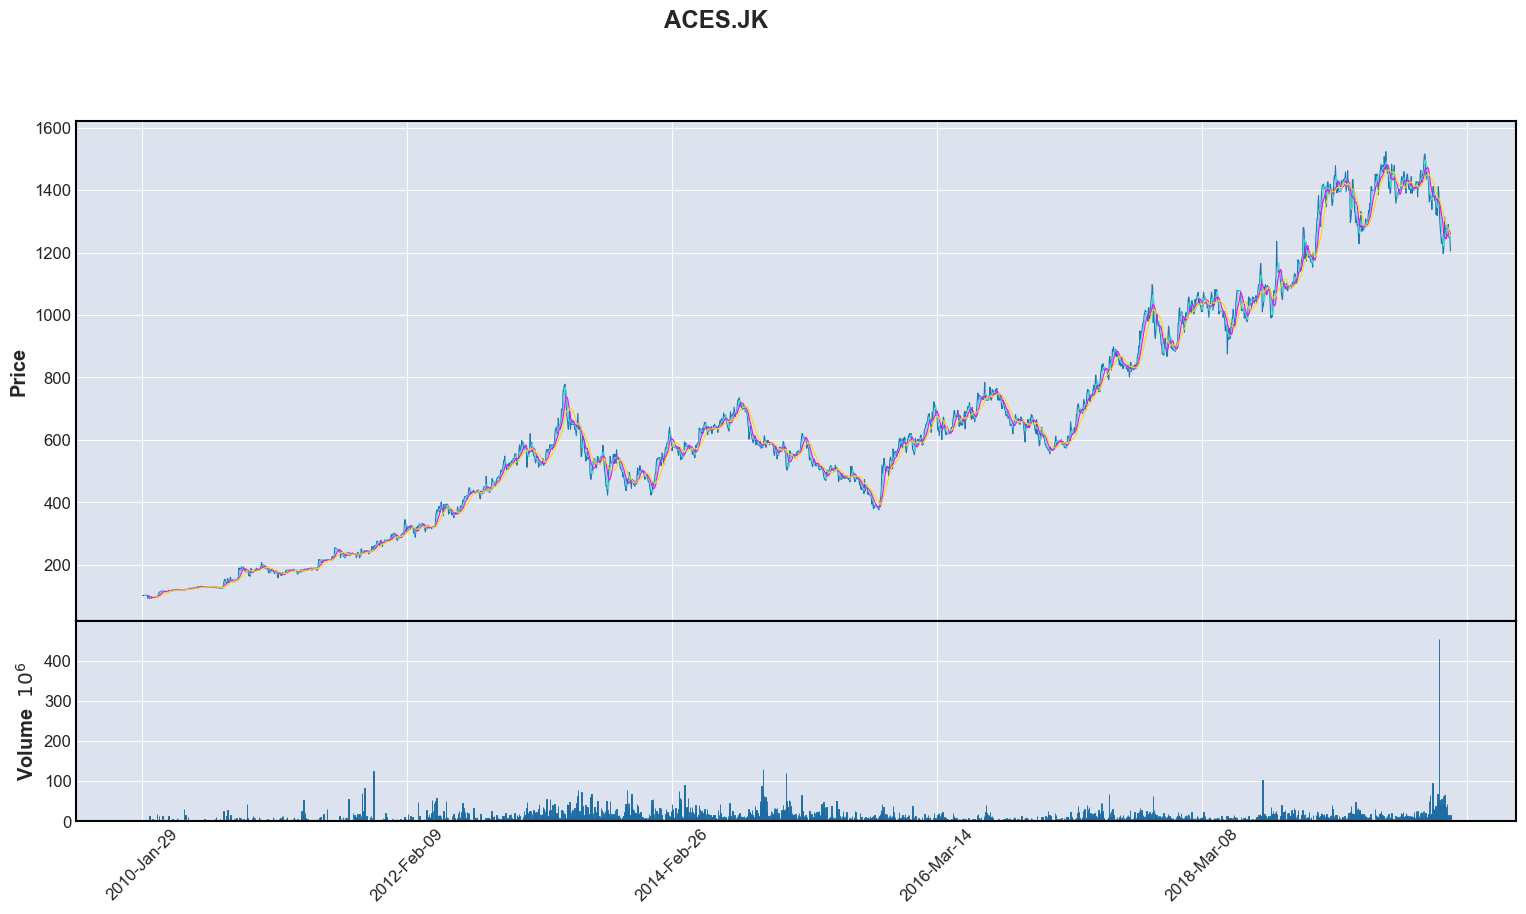


ADRO.JK


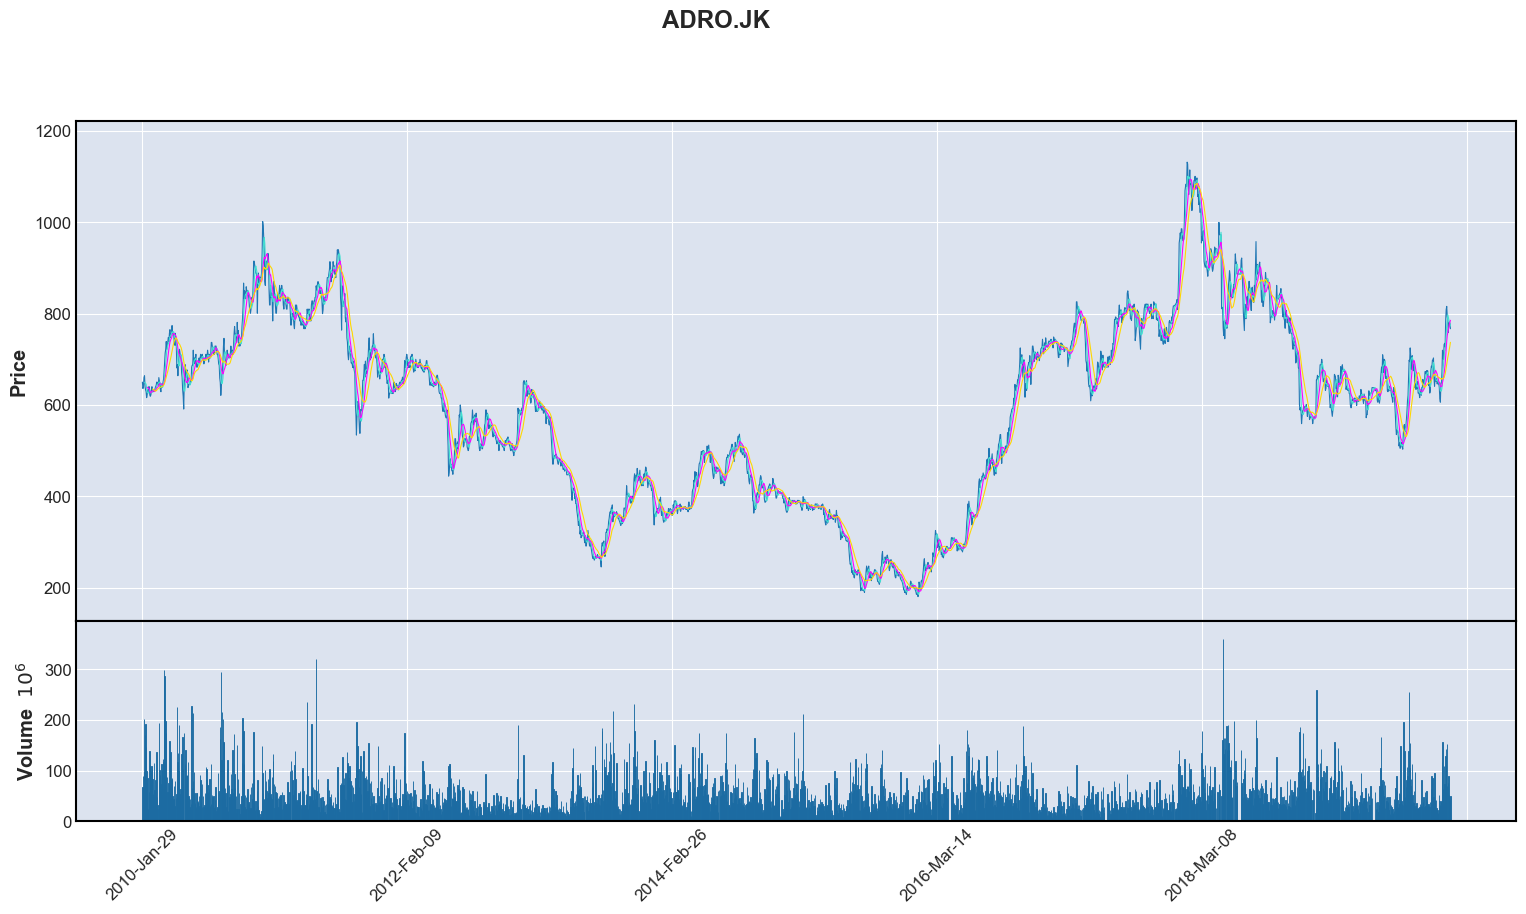


AKRA.JK


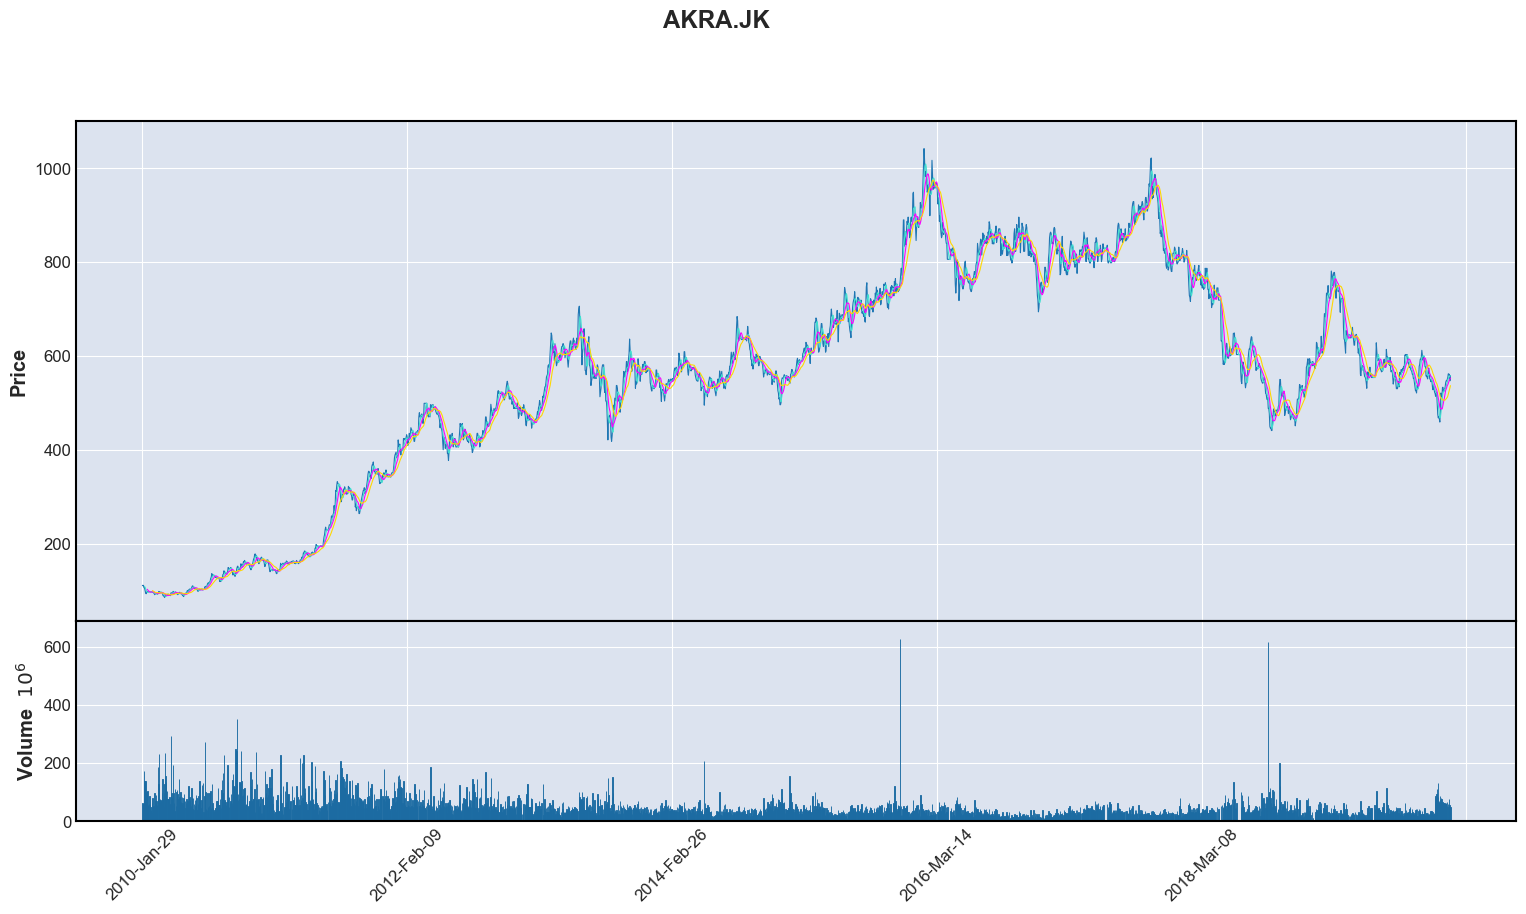


ASII.JK


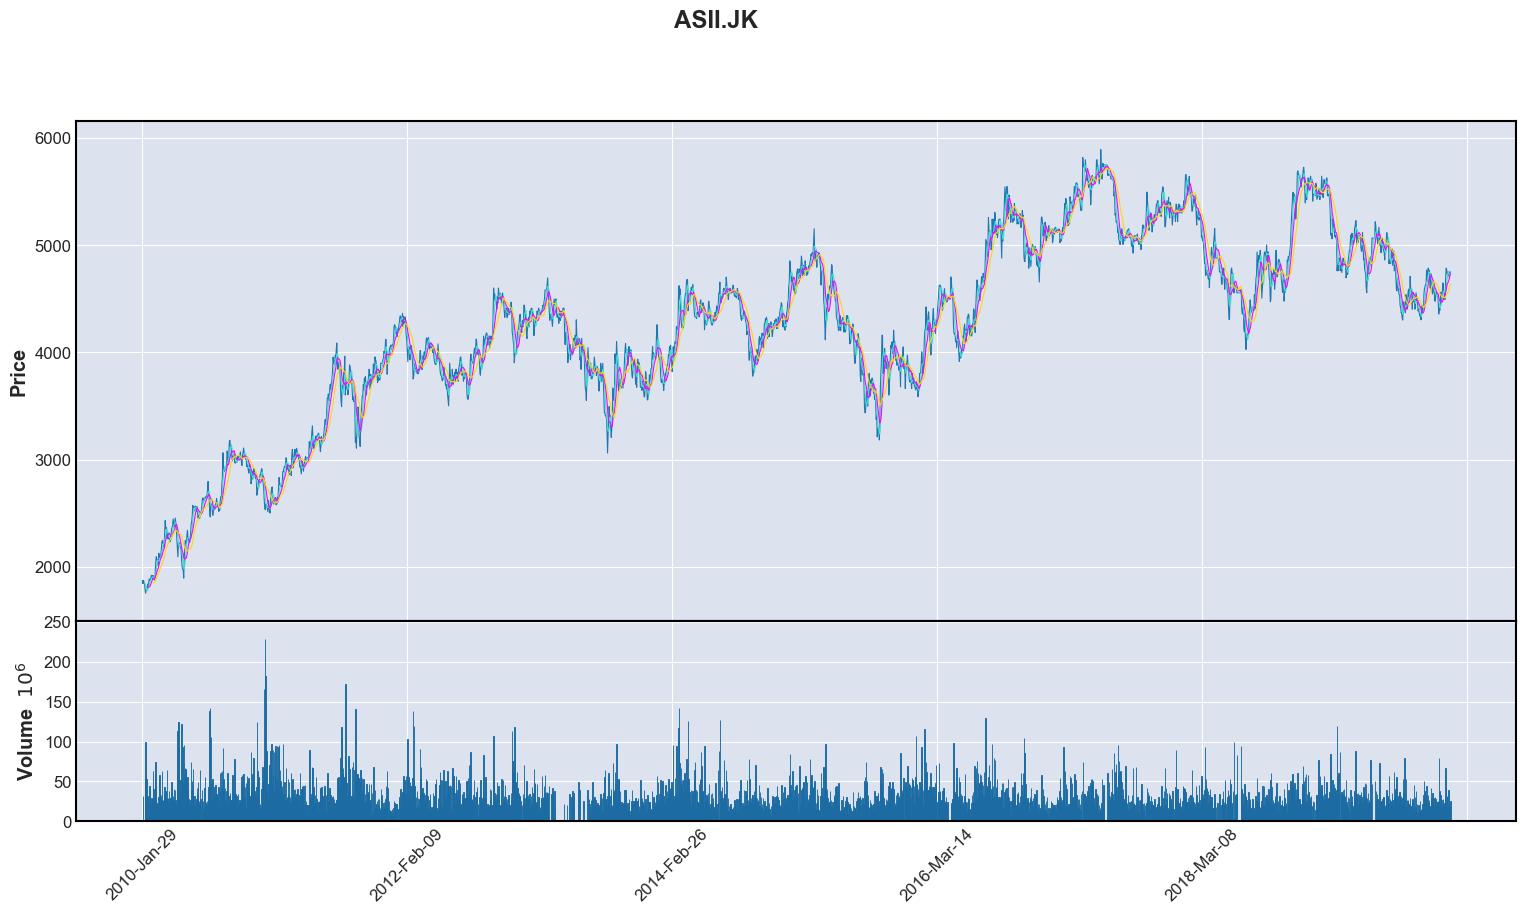


BBCA.JK


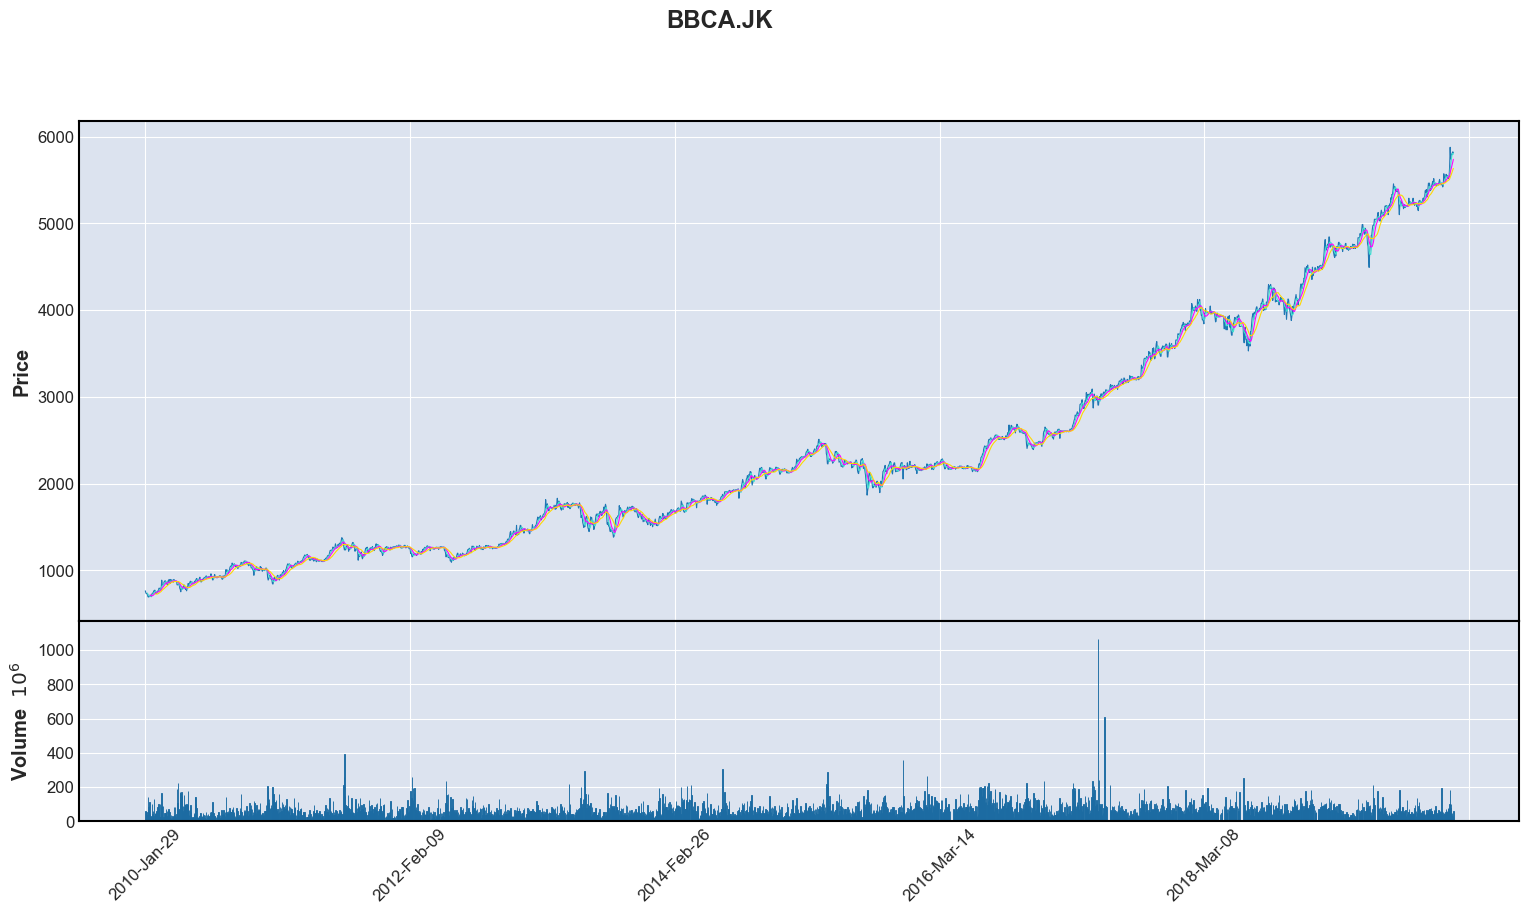


BBNI.JK


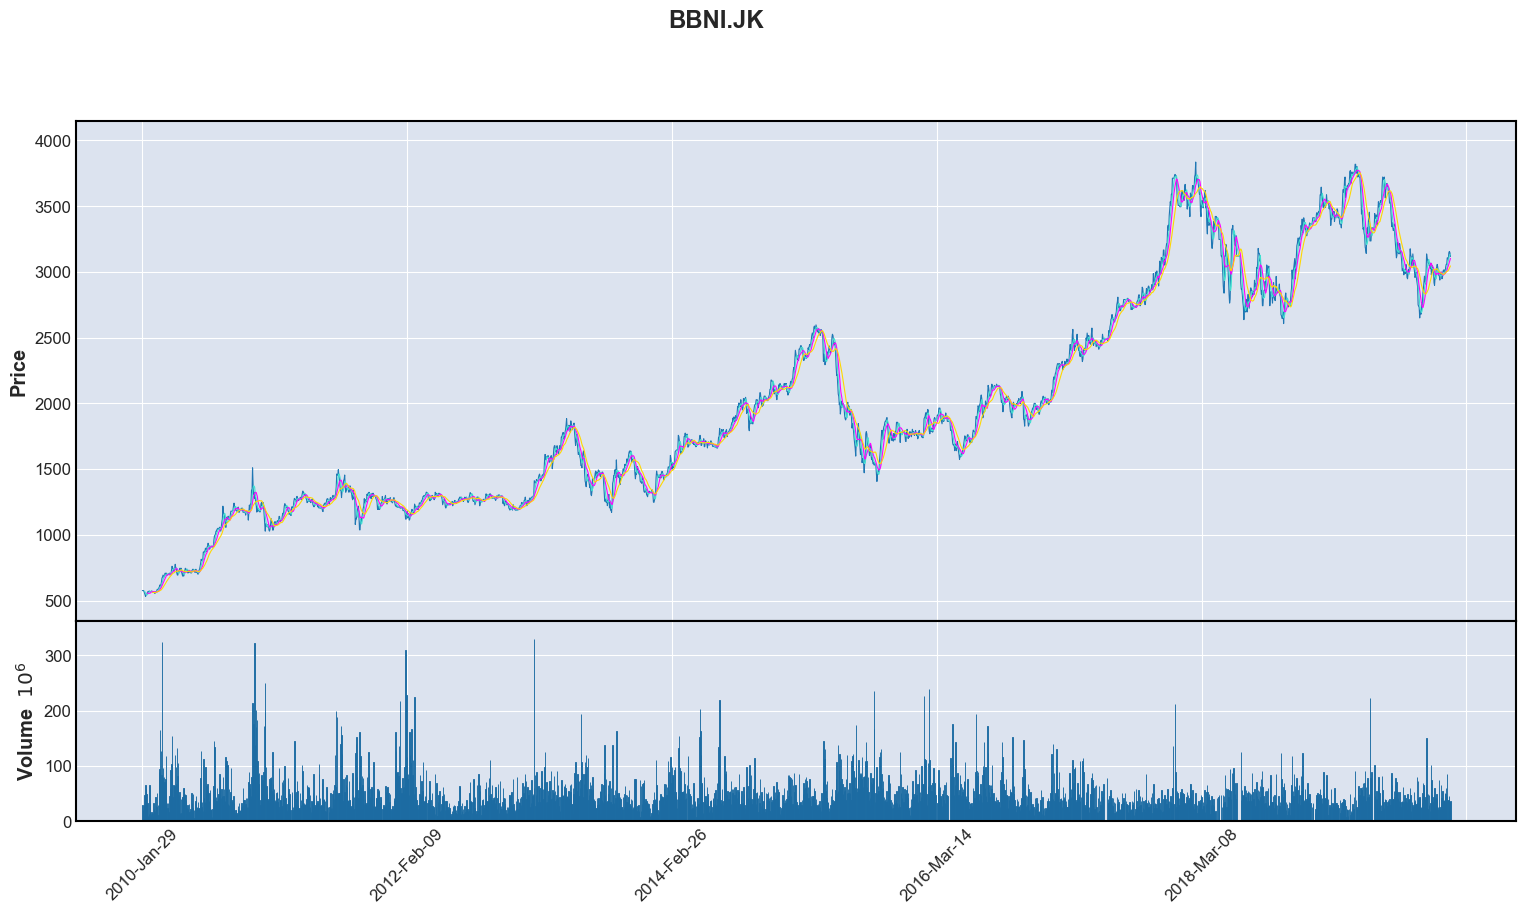


BBRI.JK


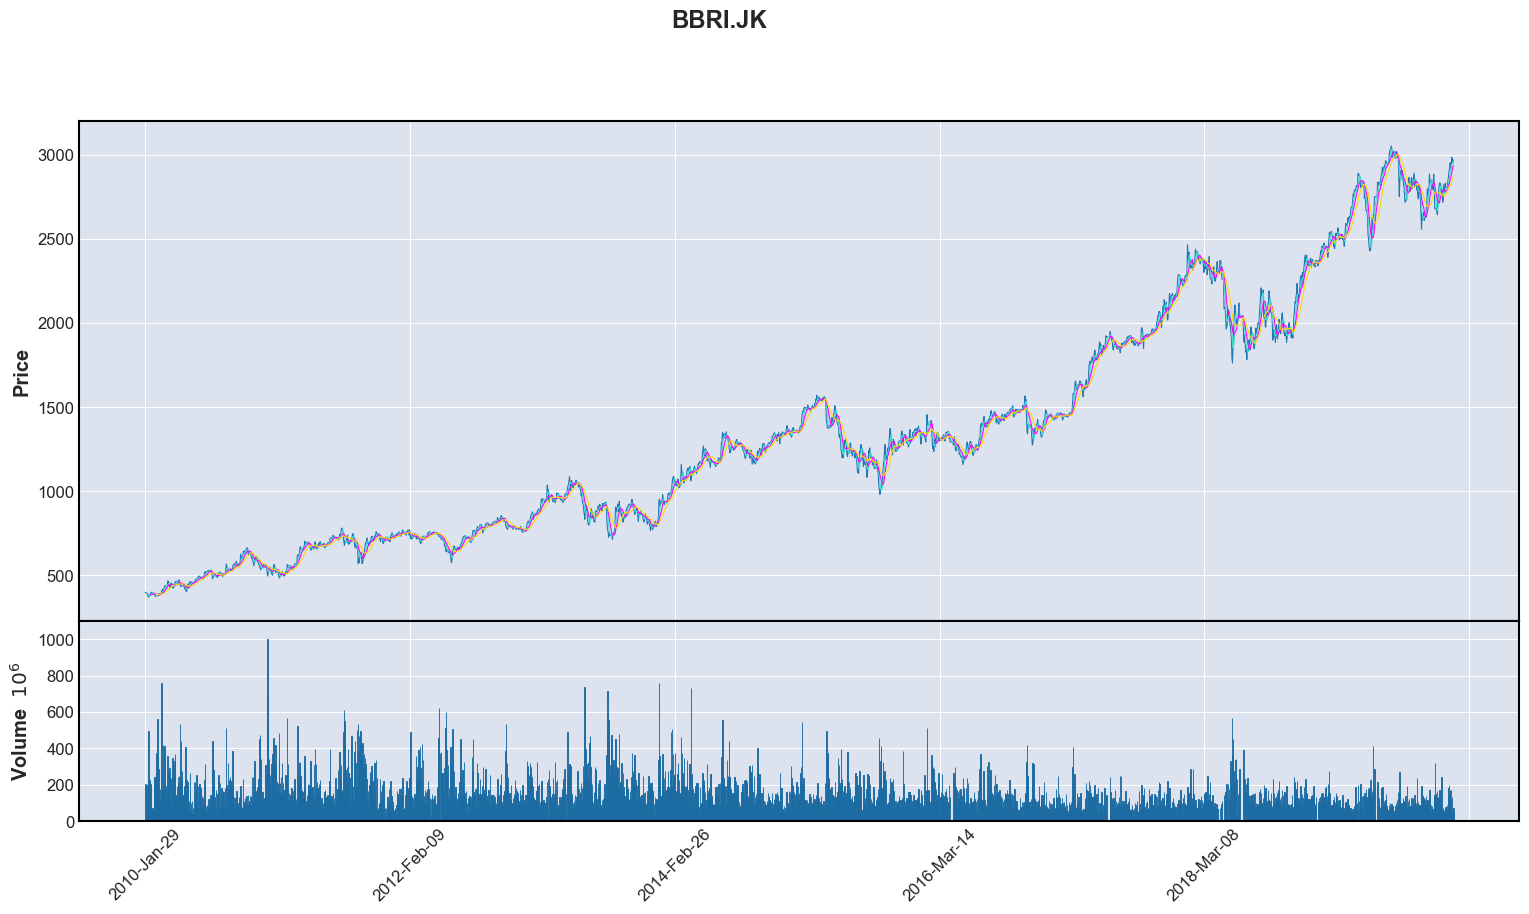


BMRI.JK


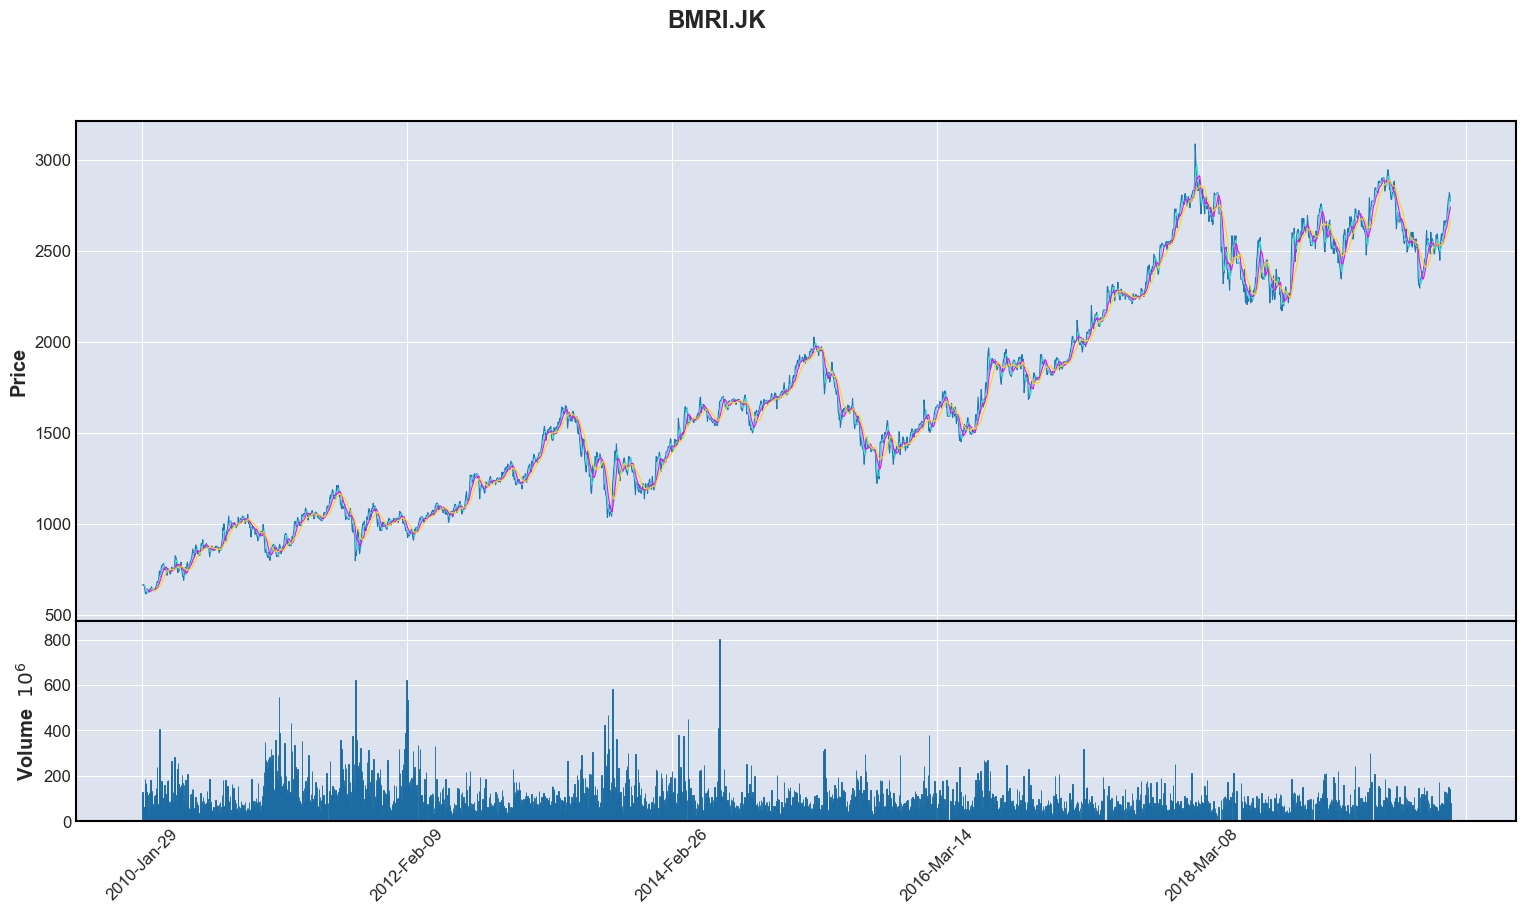


BRPT.JK


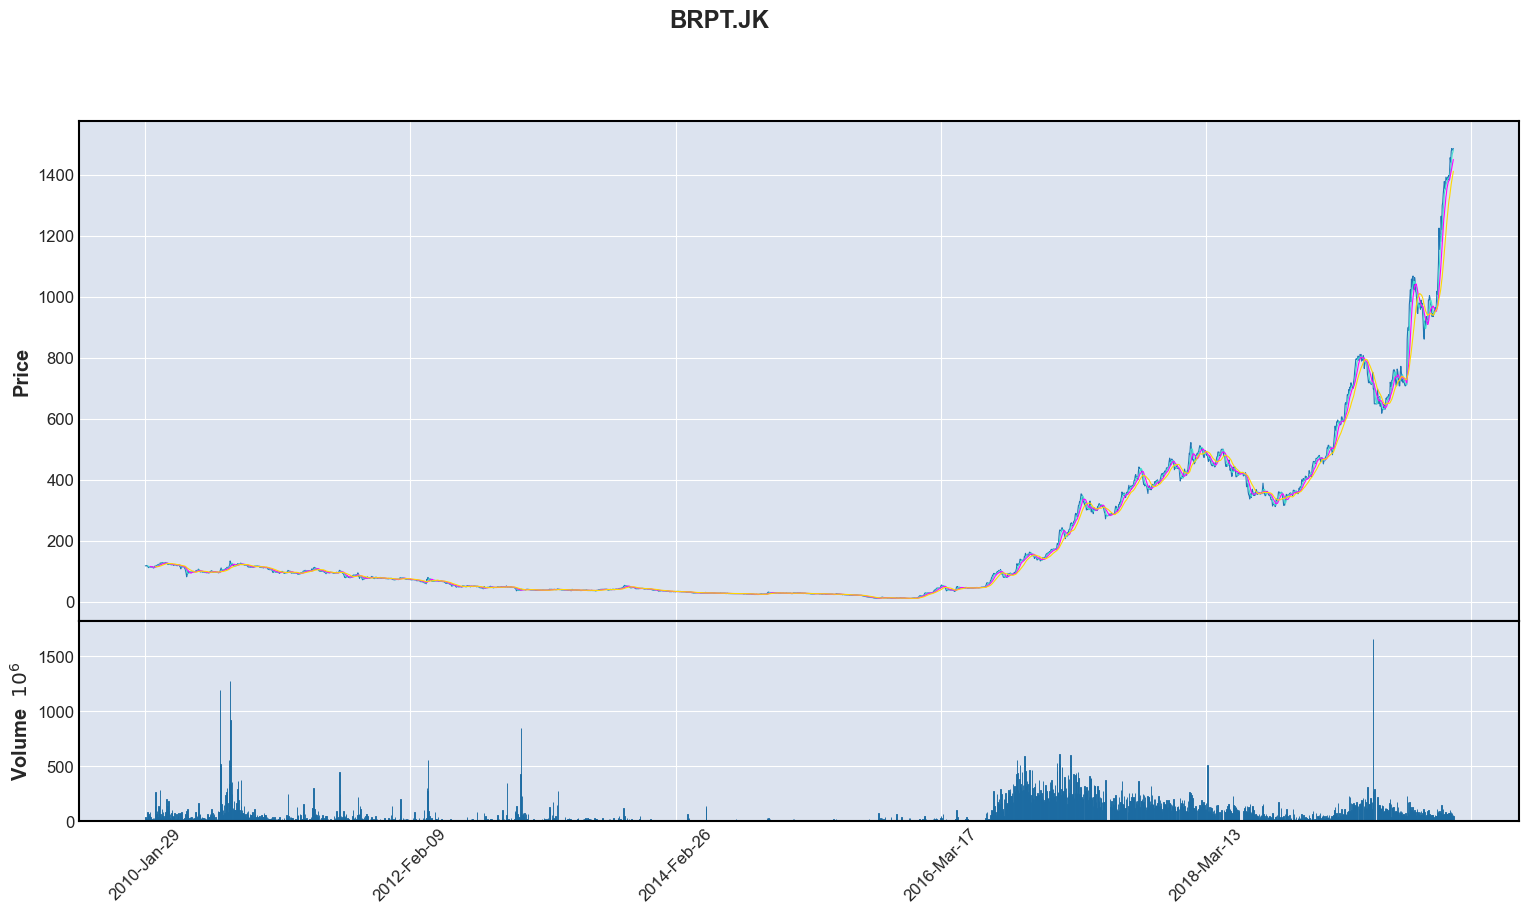


CPIN.JK


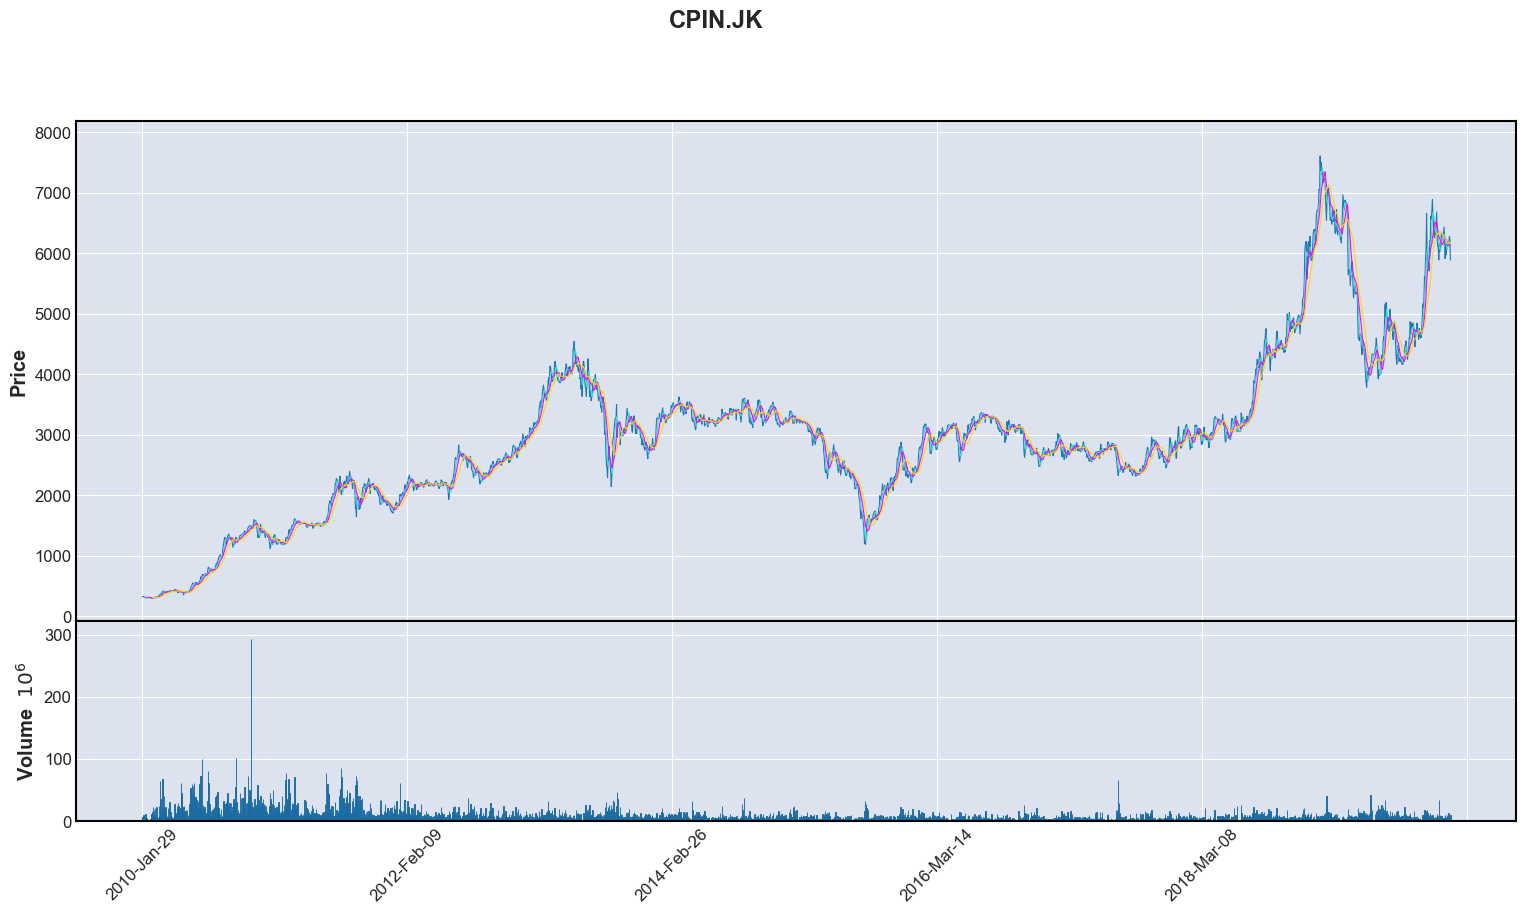


EXCL.JK


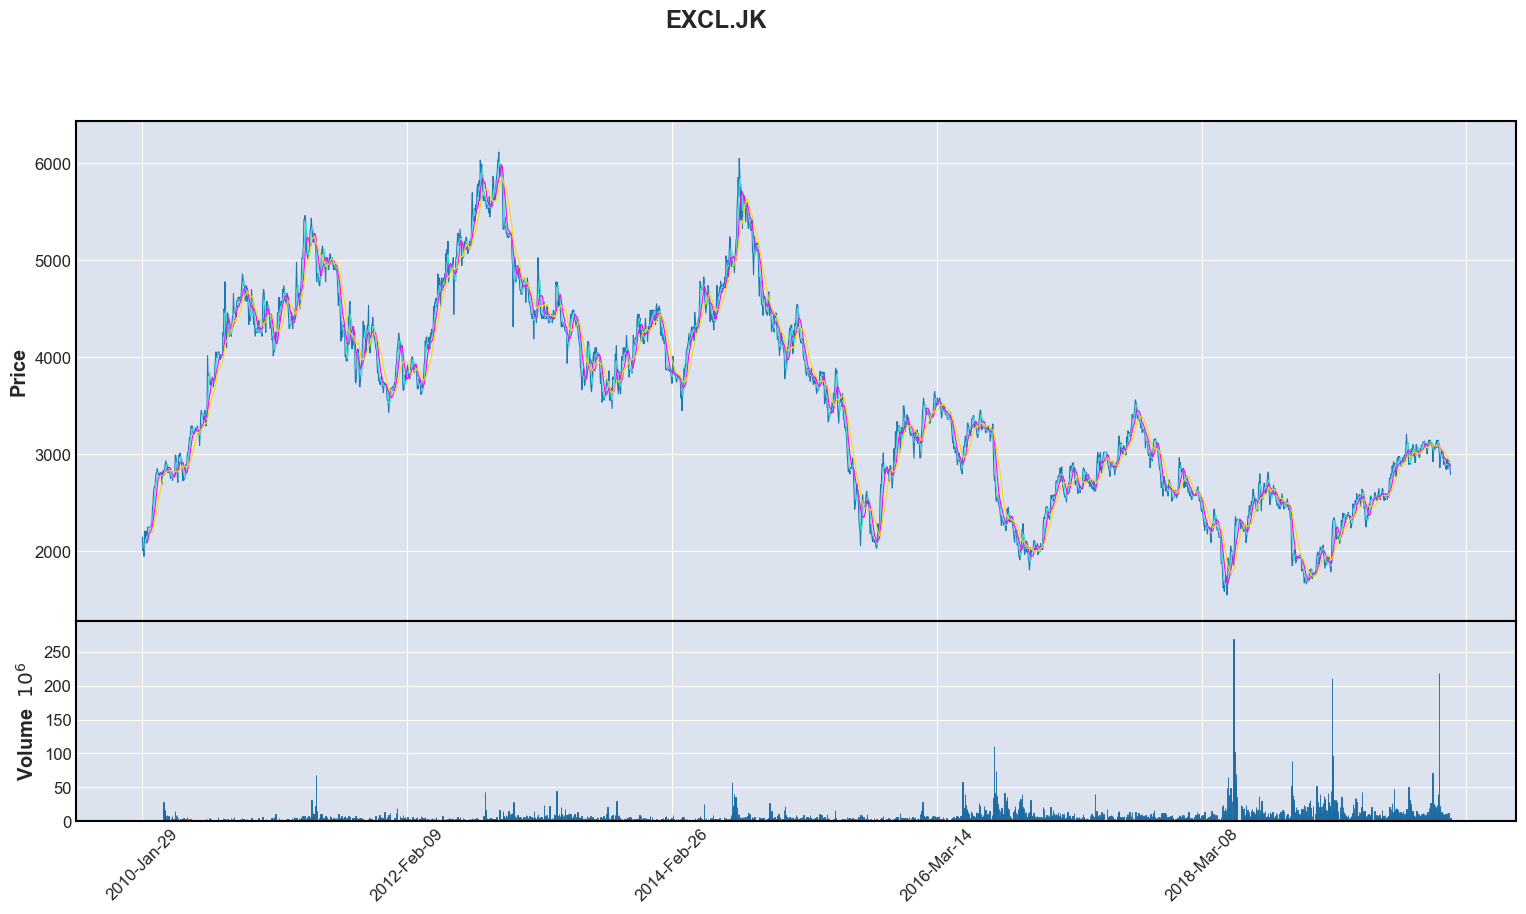


GGRM.JK


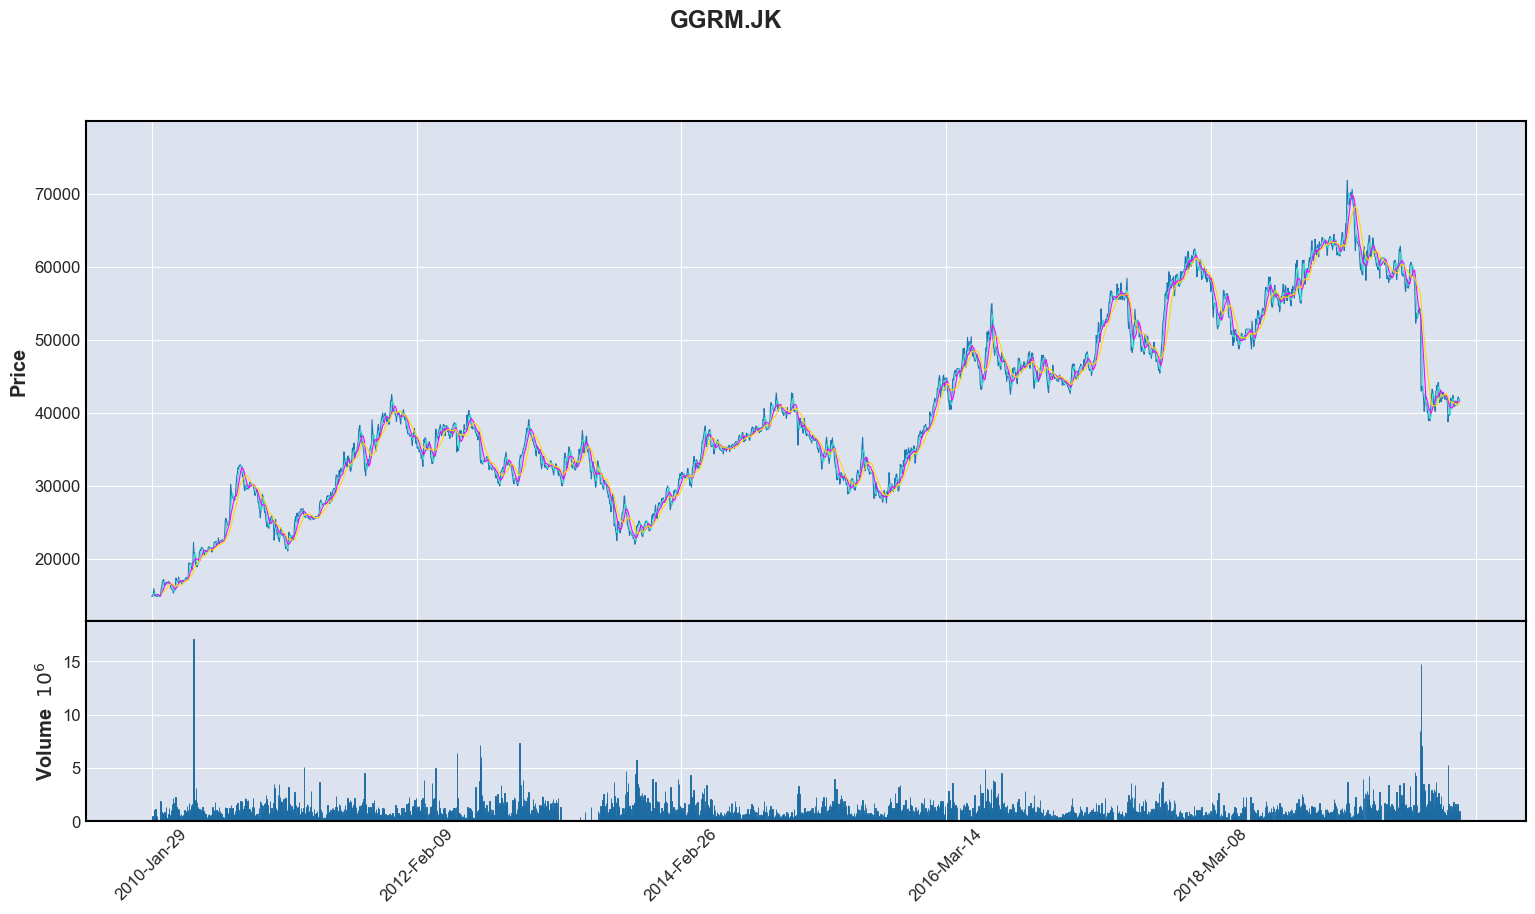


HMSP.JK


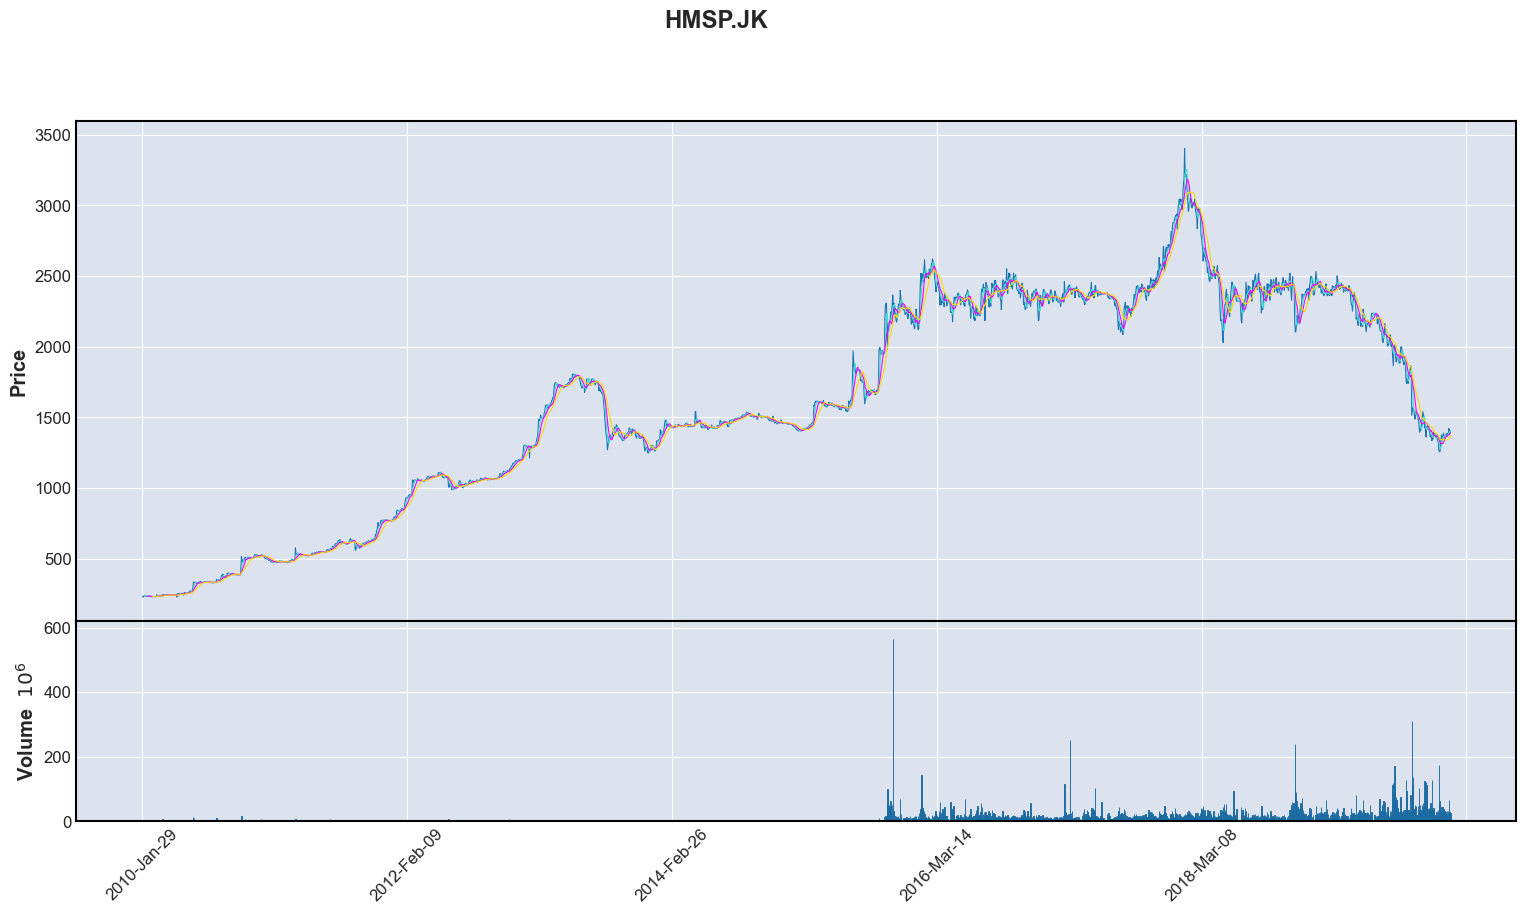


ICBP.JK


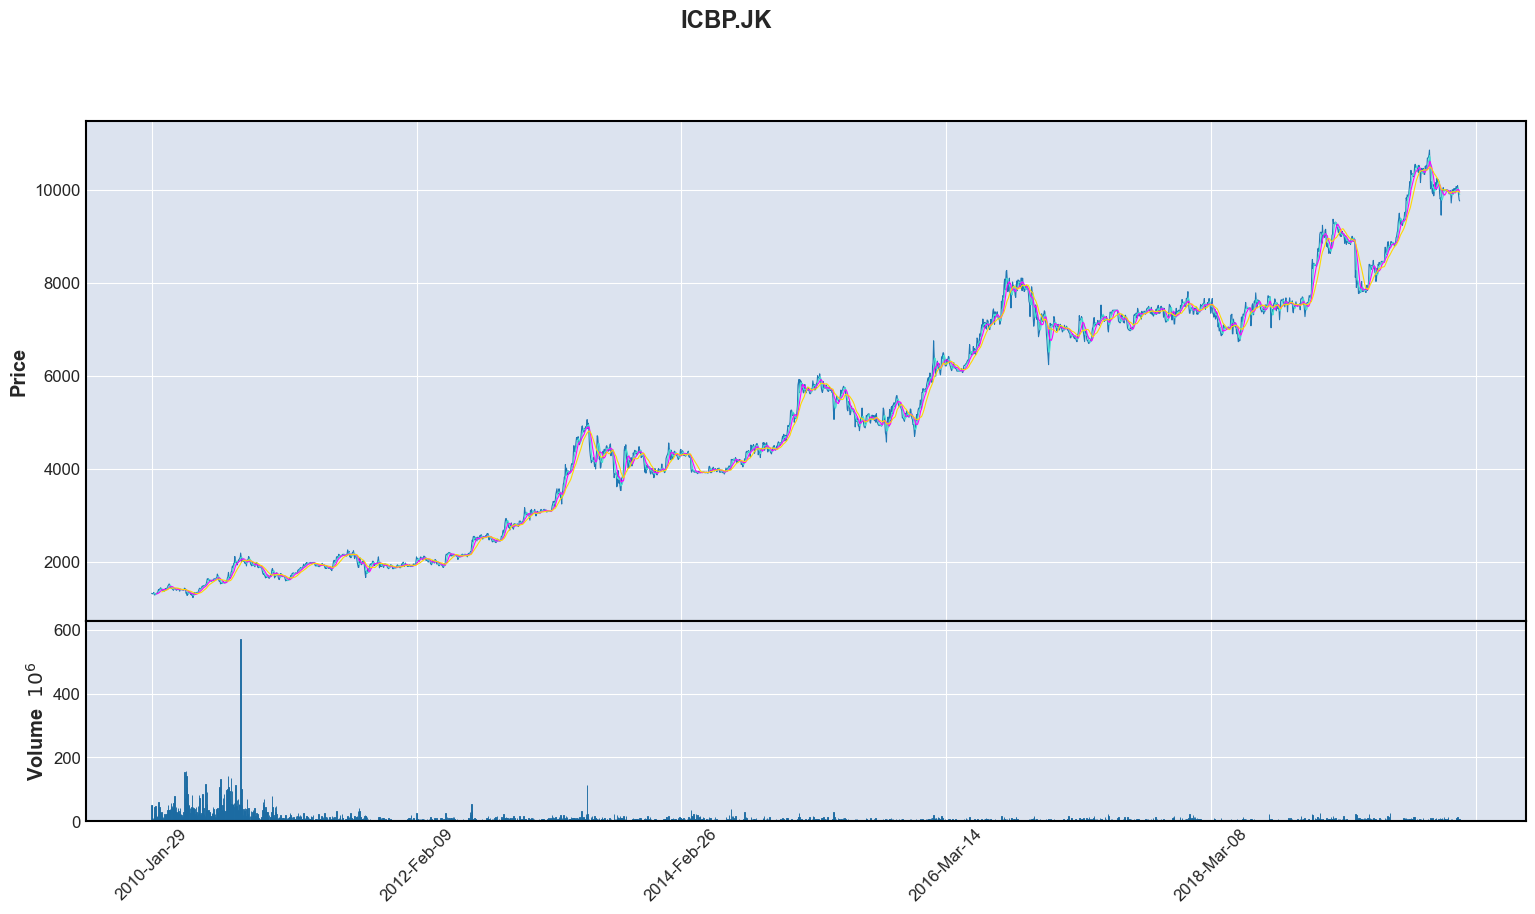


INCO.JK


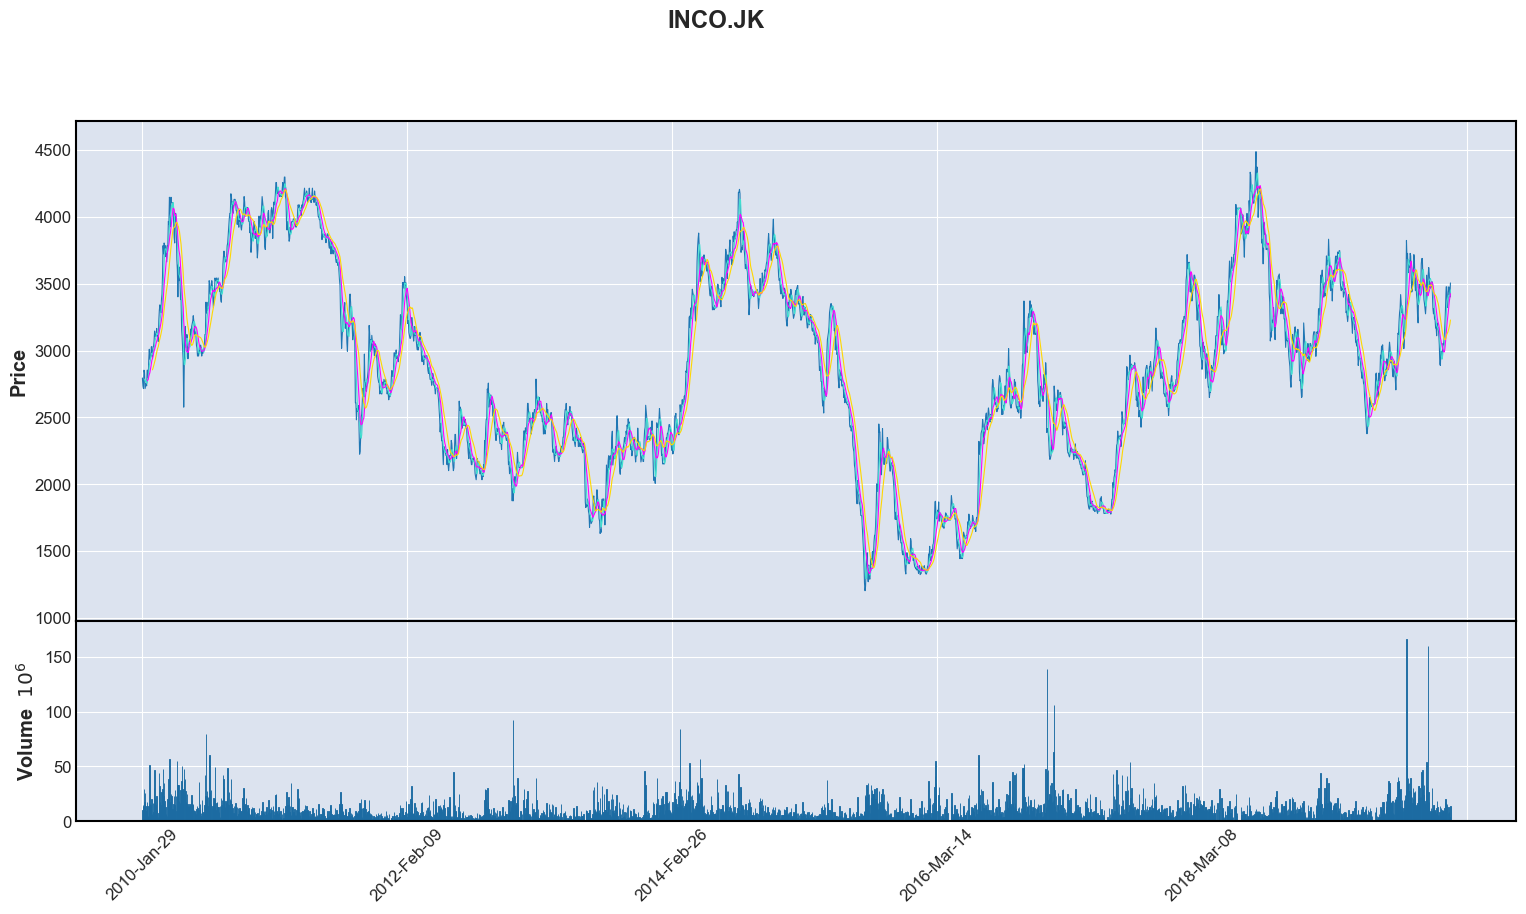


INDF.JK


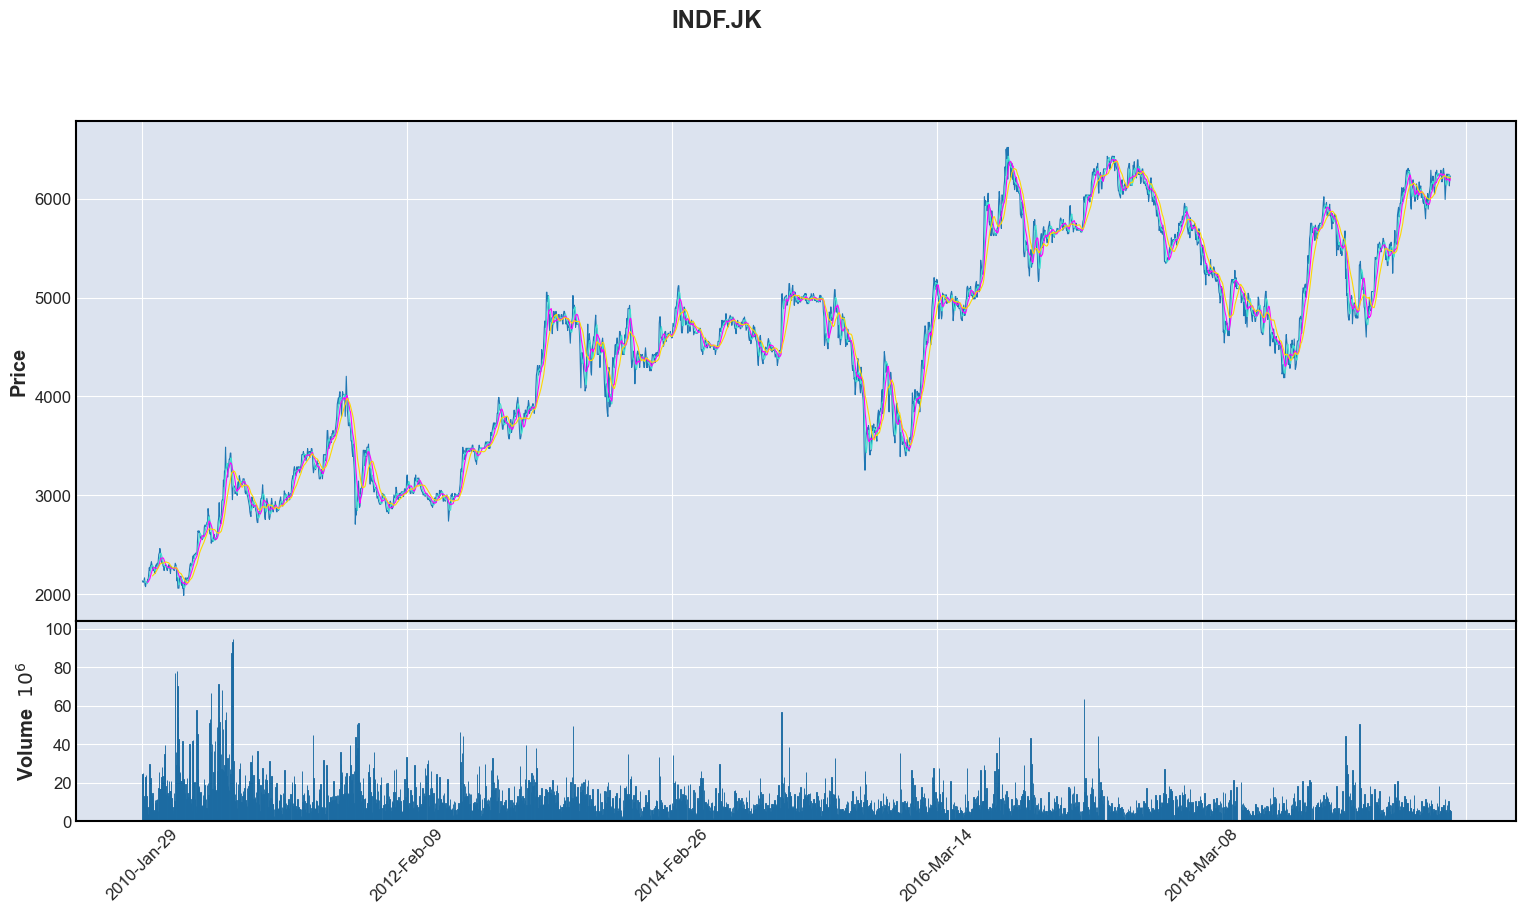


INKP.JK


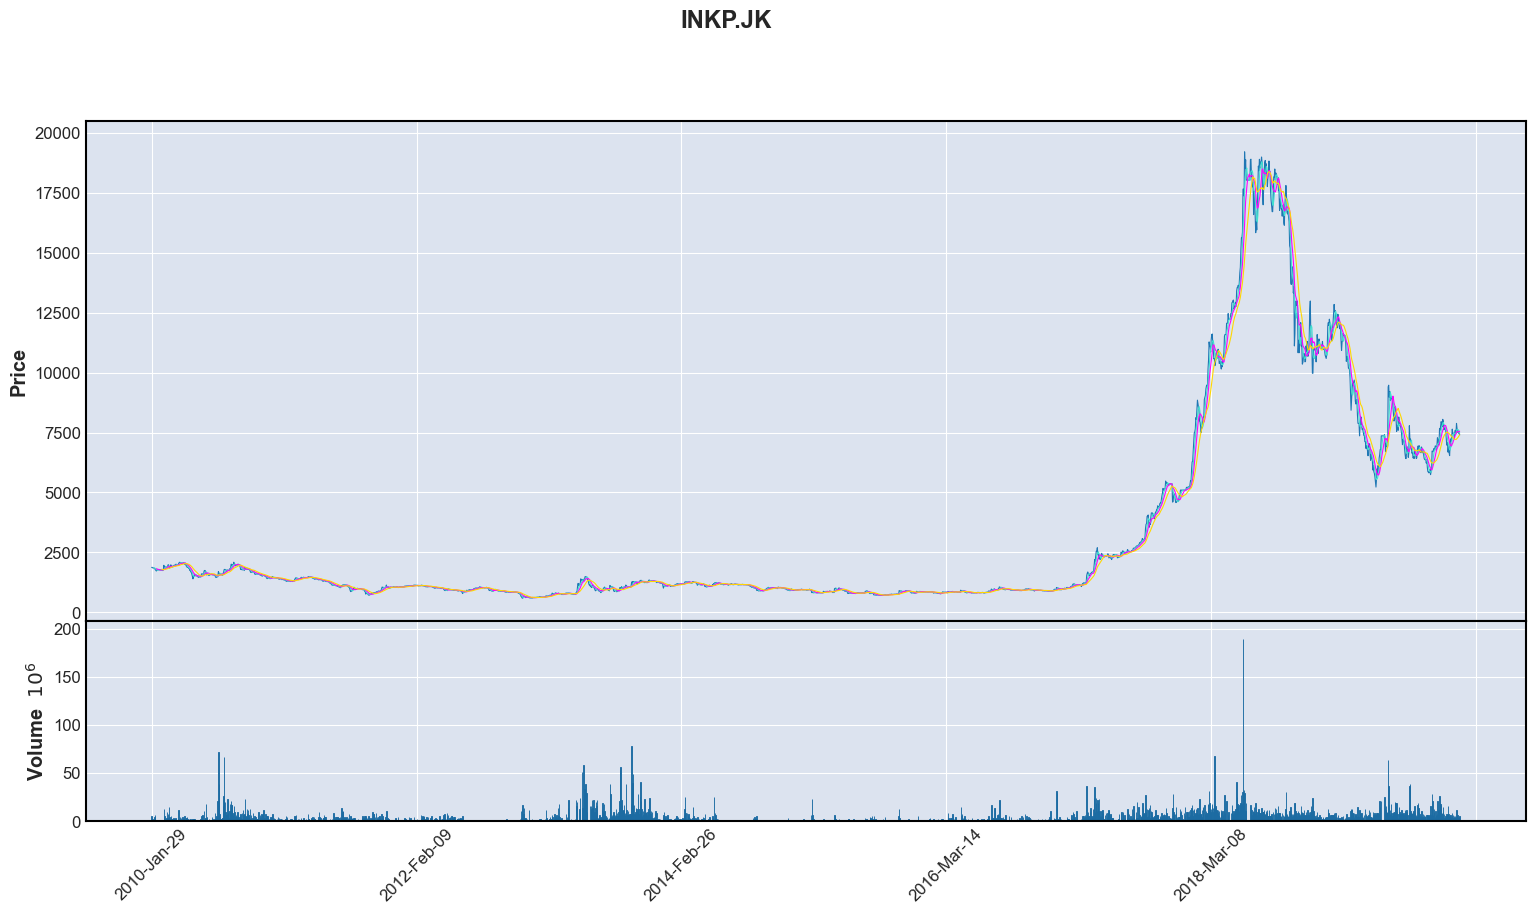


INTP.JK


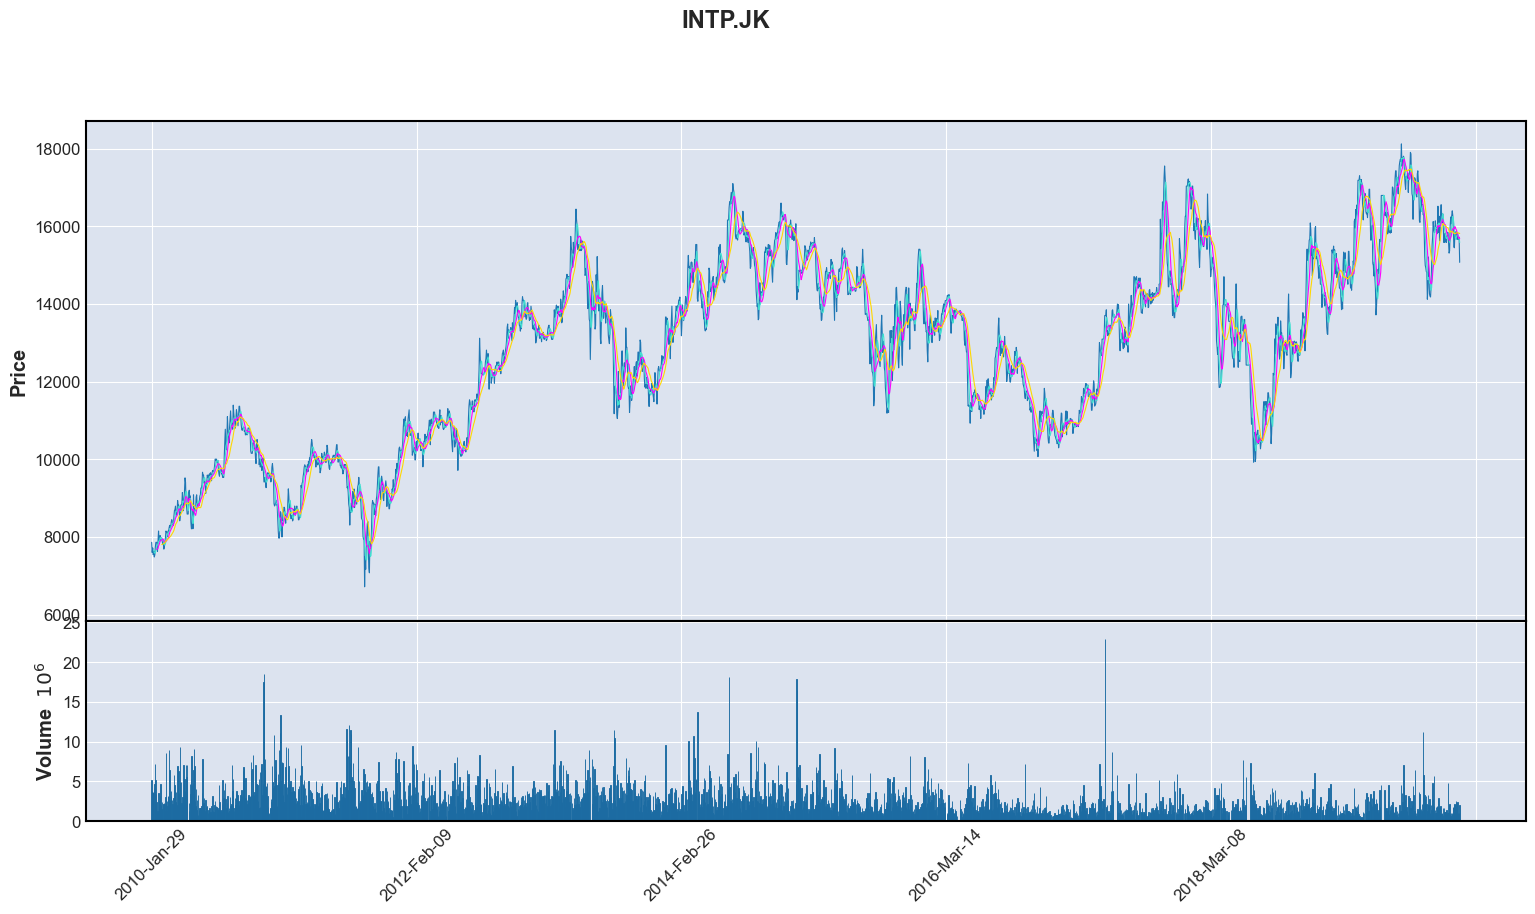


ITMG.JK


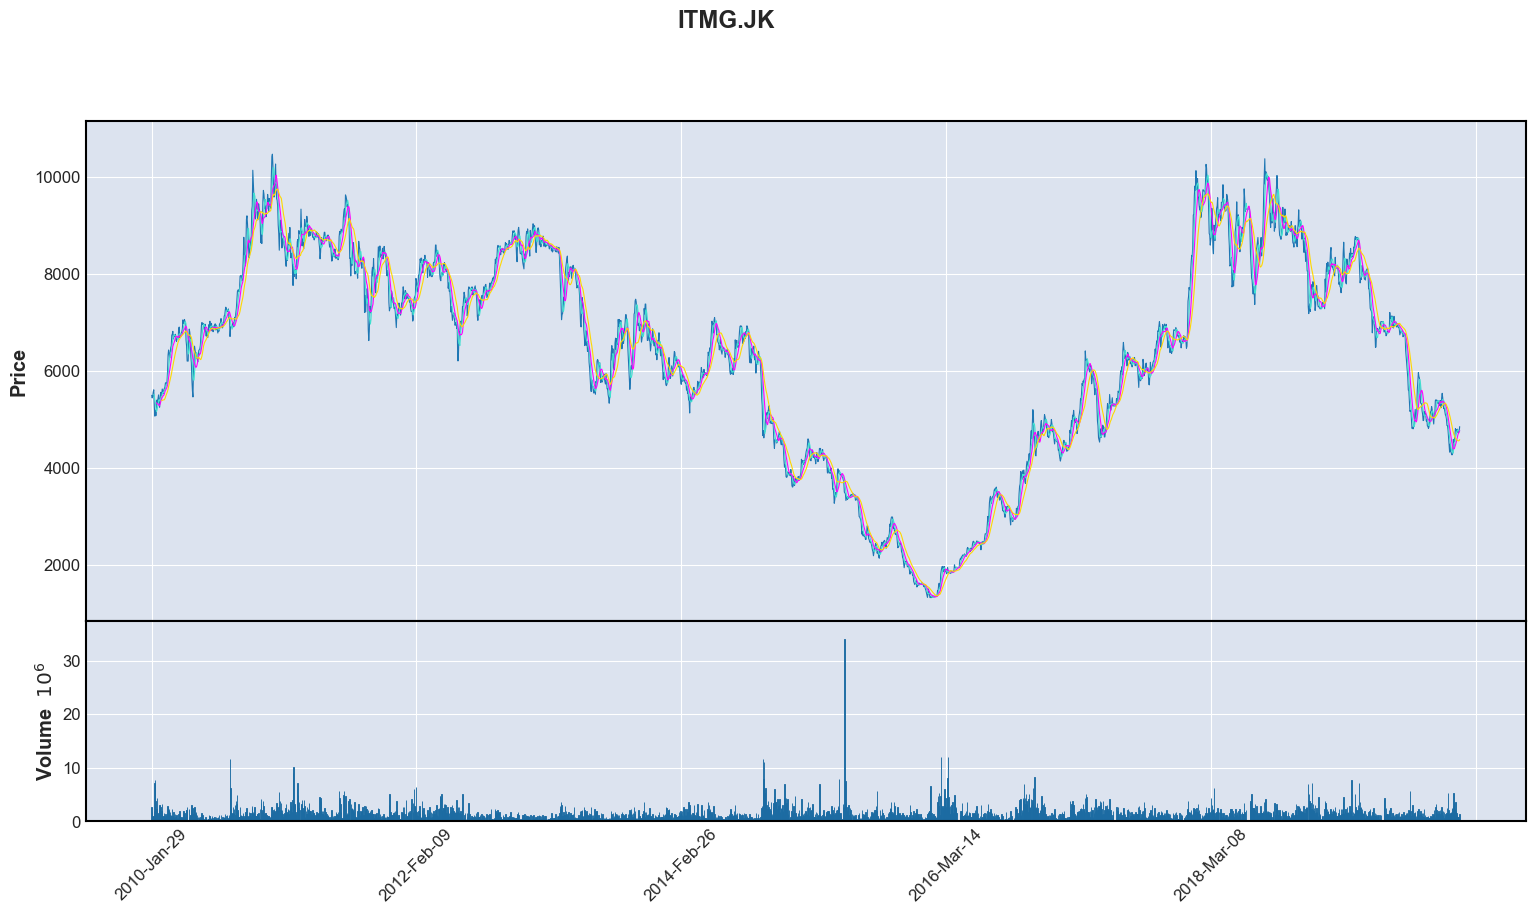


KLBF.JK


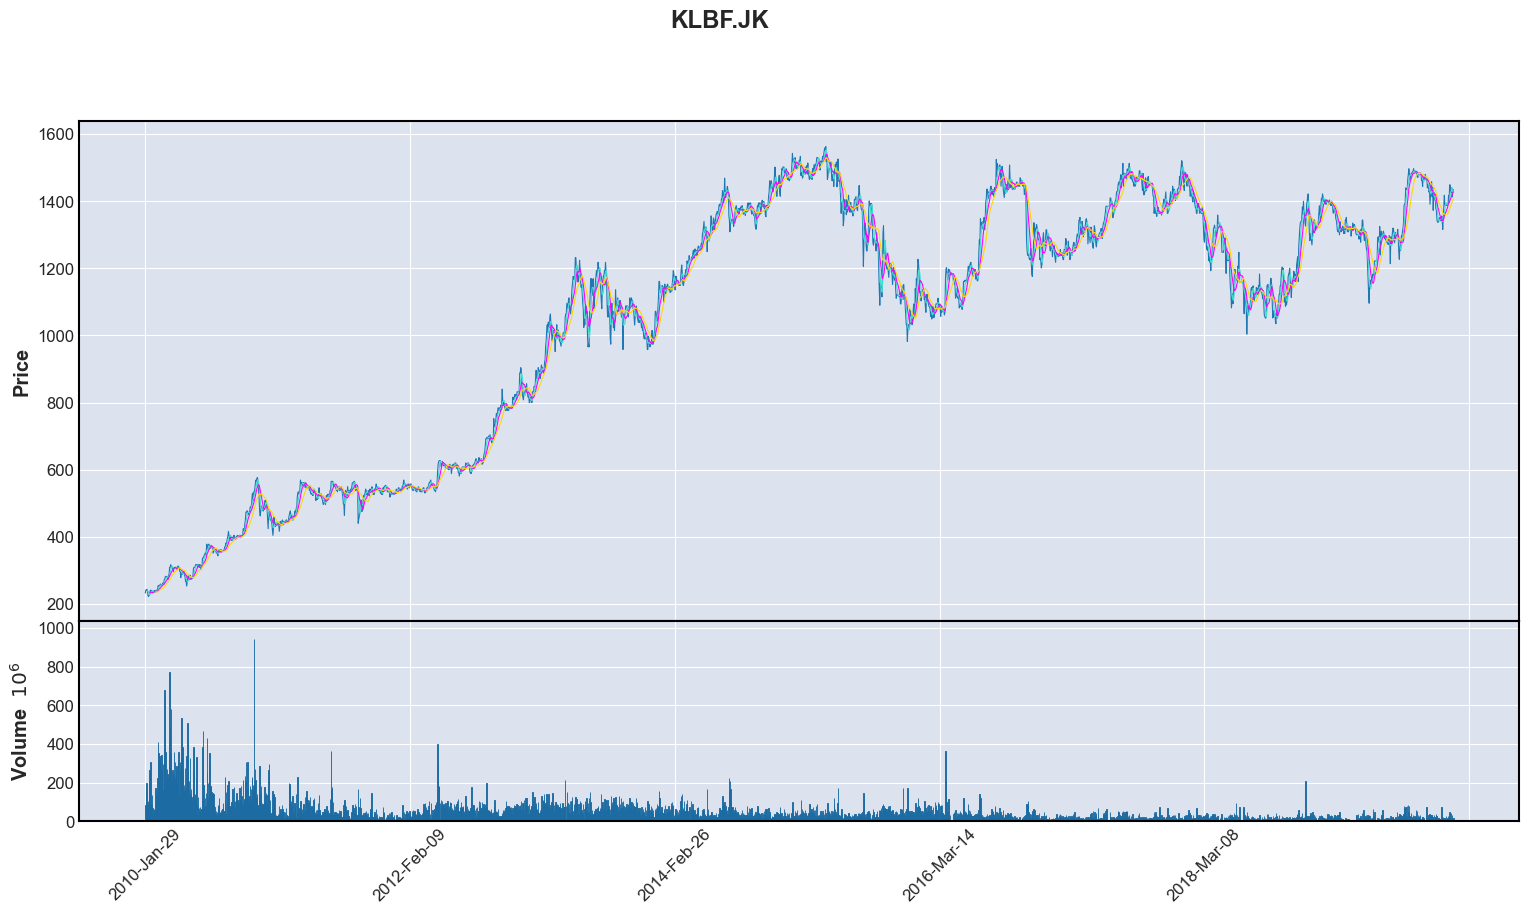


MAPI.JK


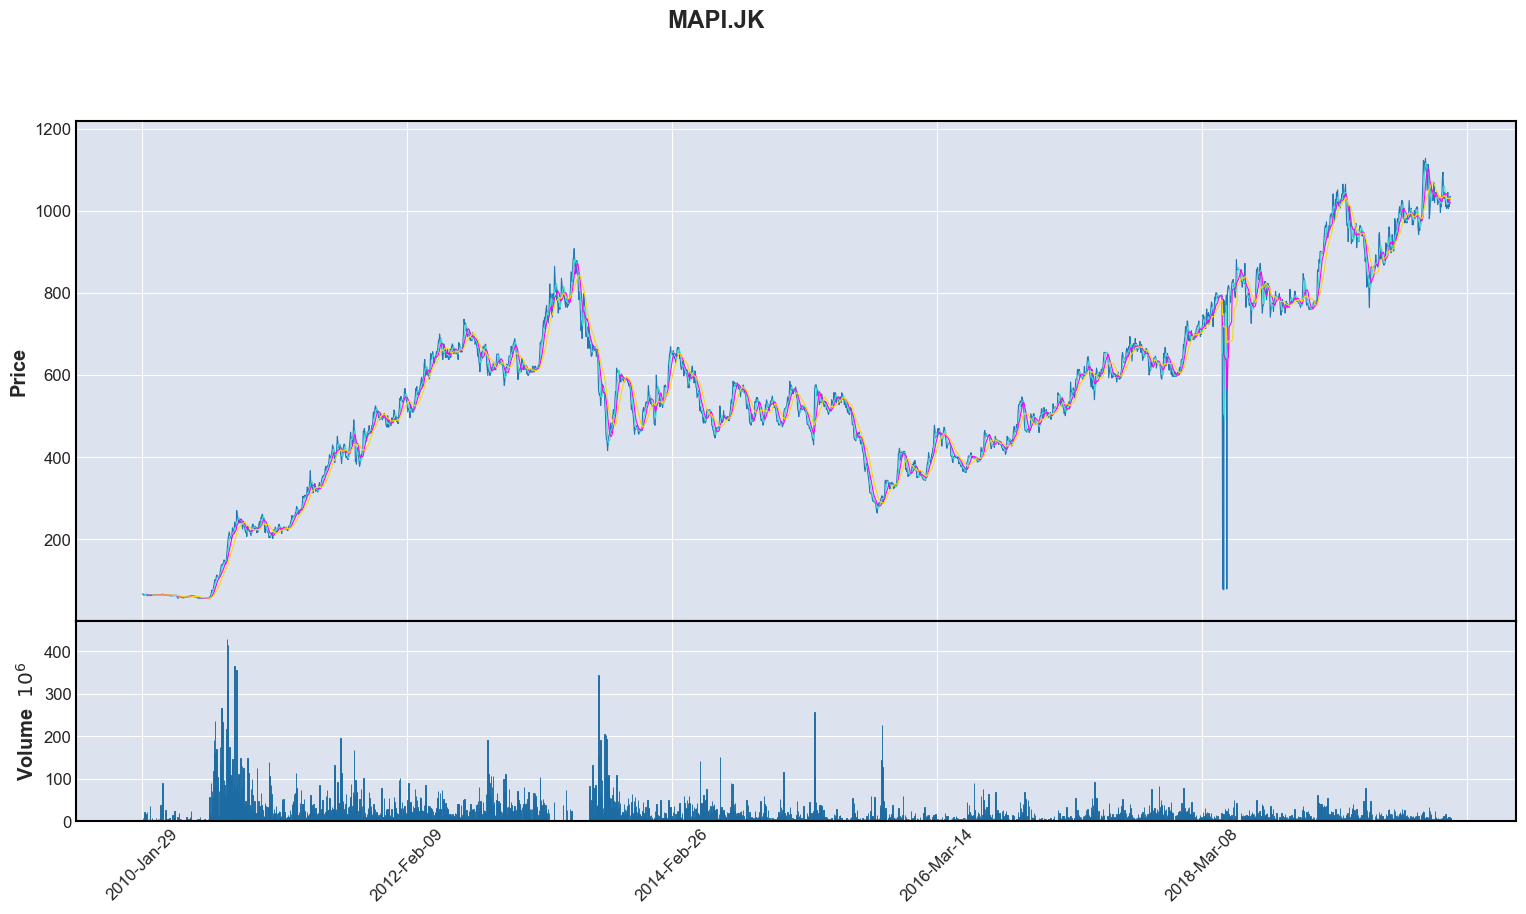


MEDC.JK


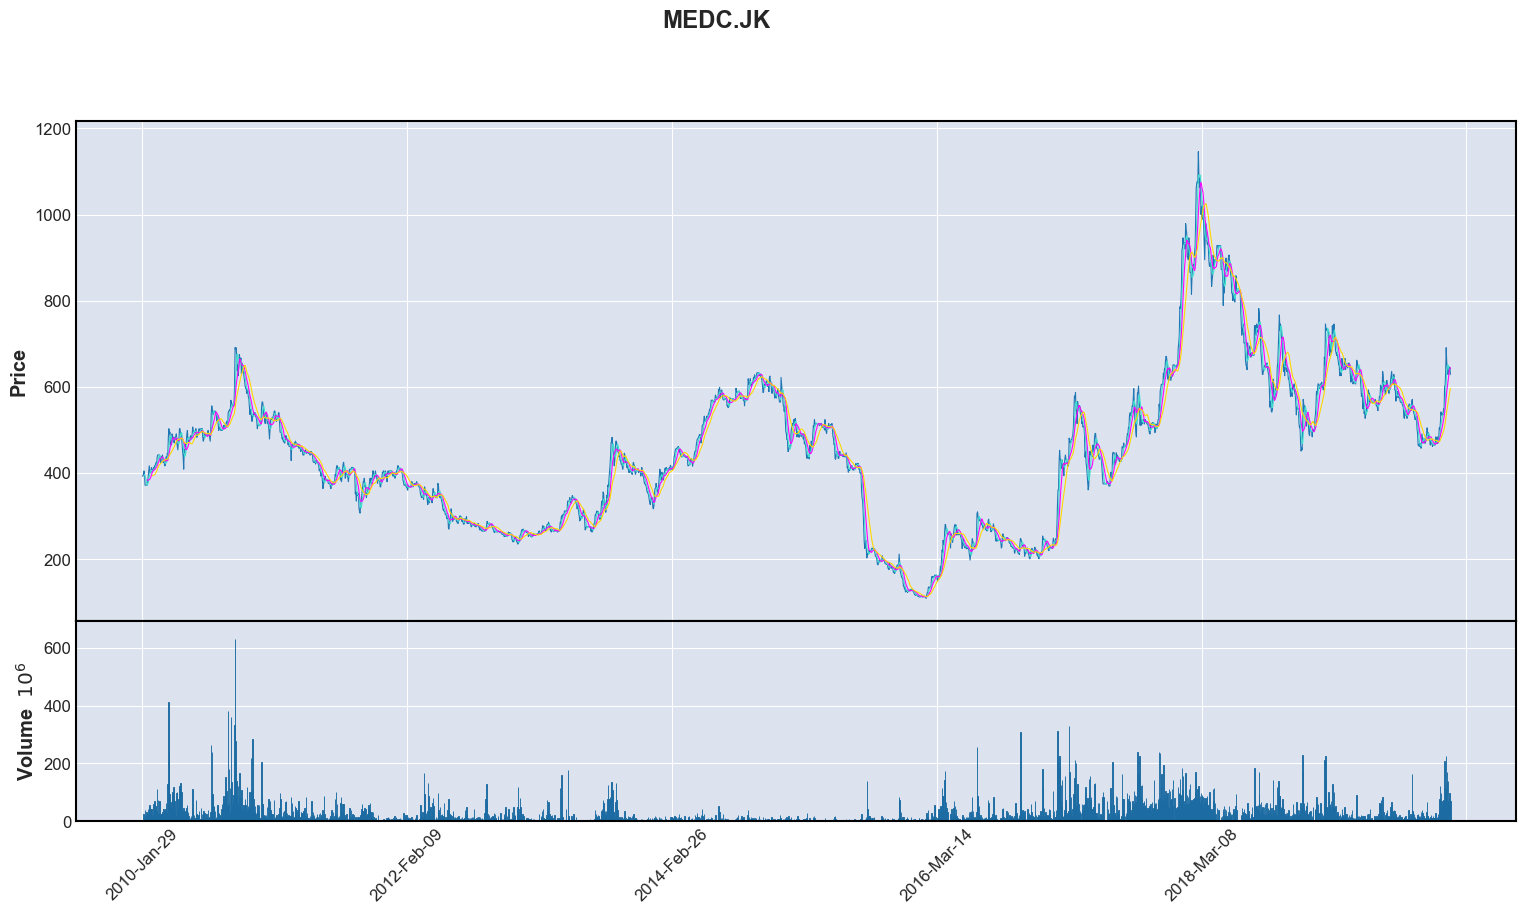


PGAS.JK


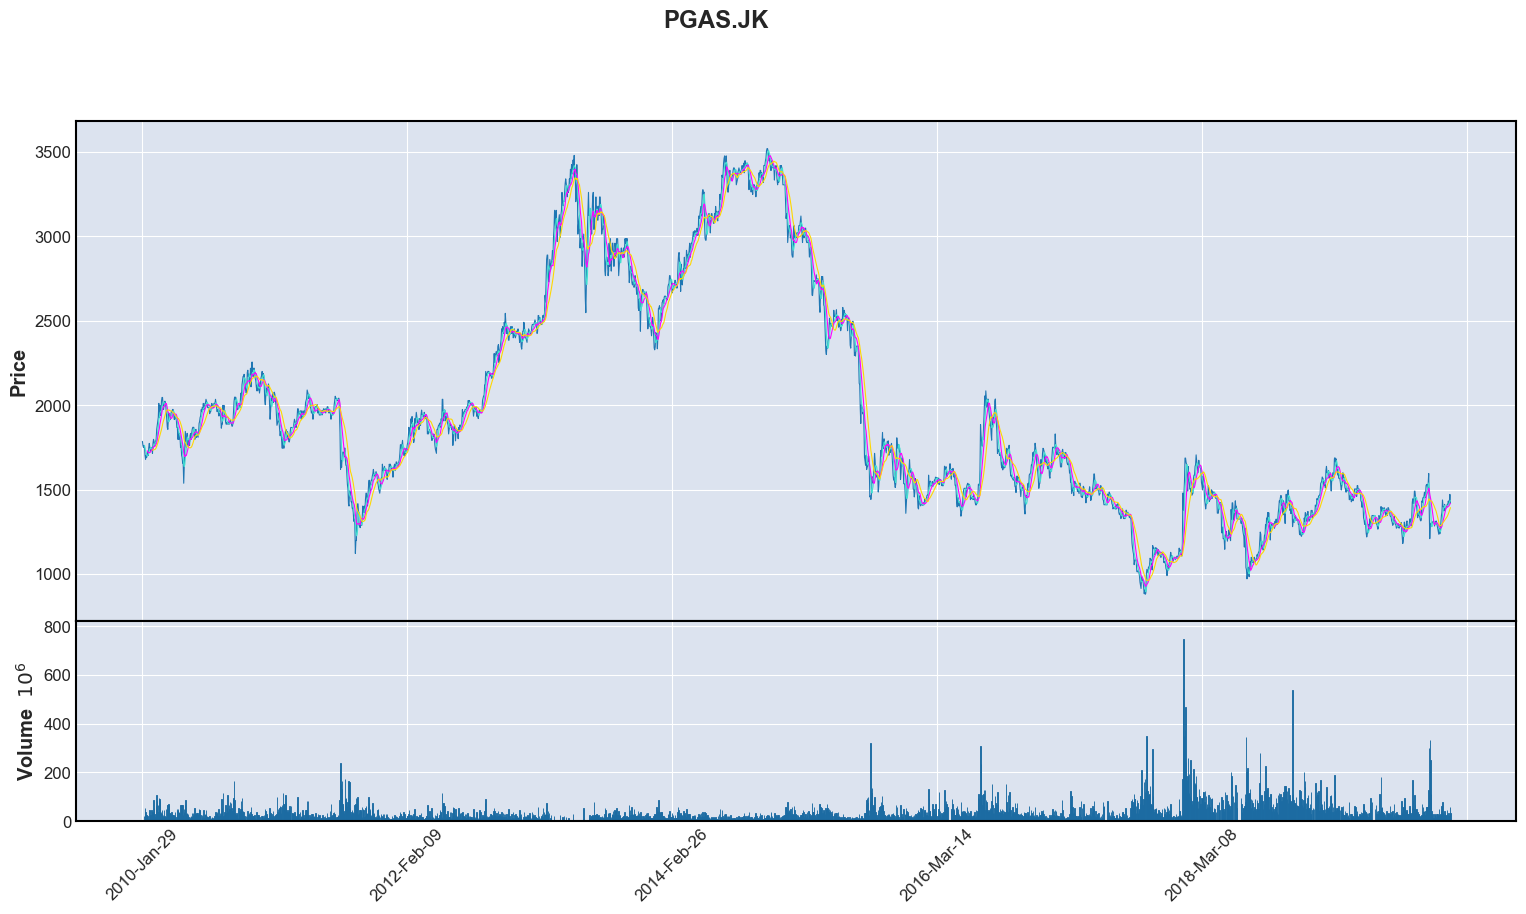


PTBA.JK


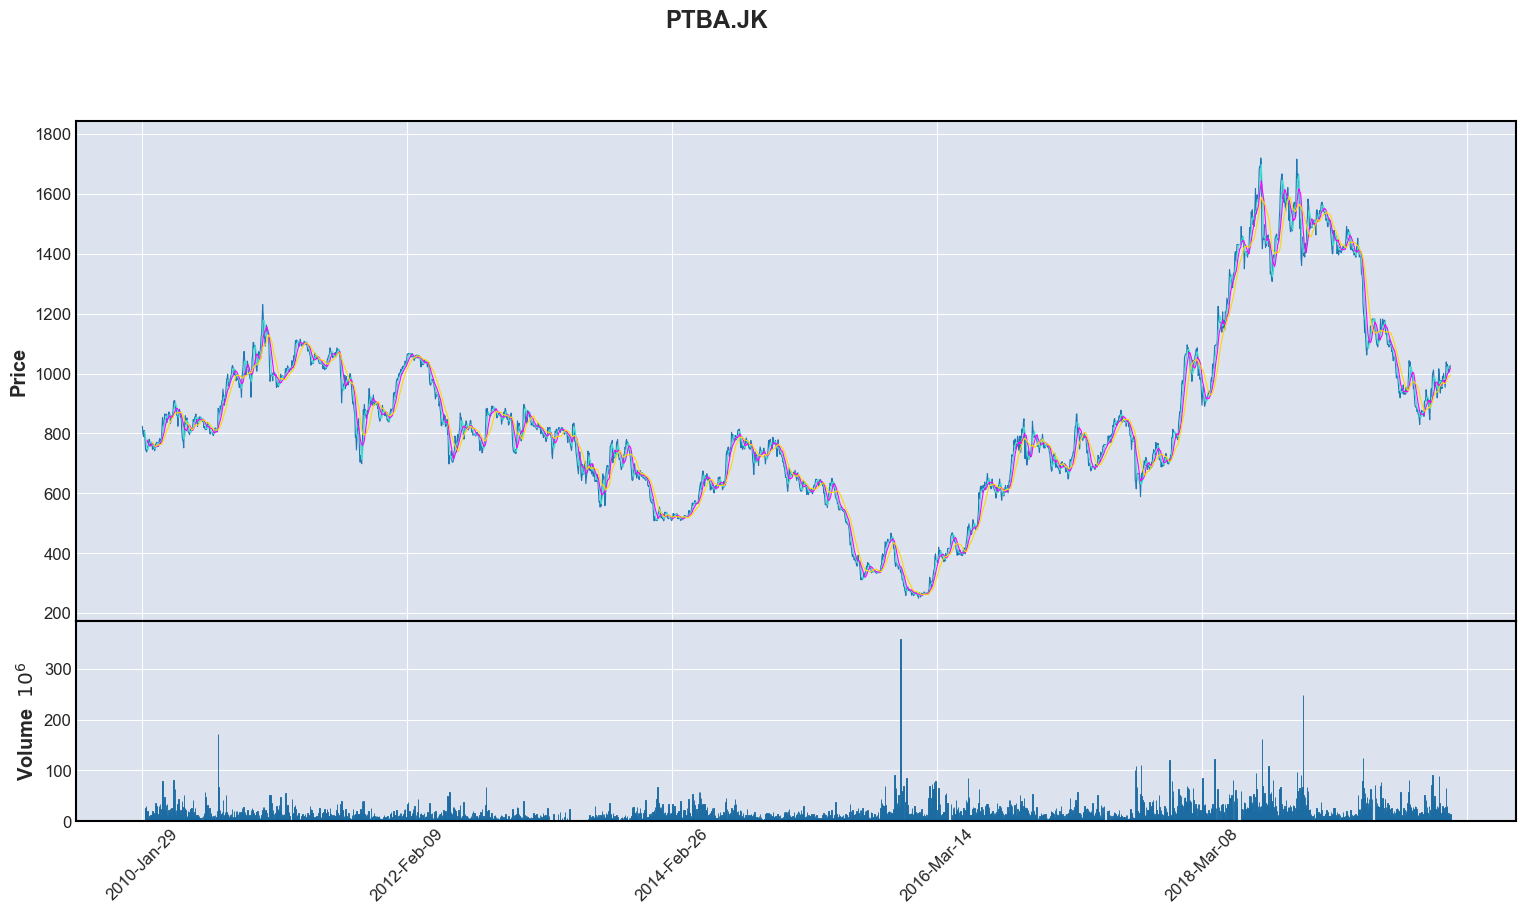


SMGR.JK


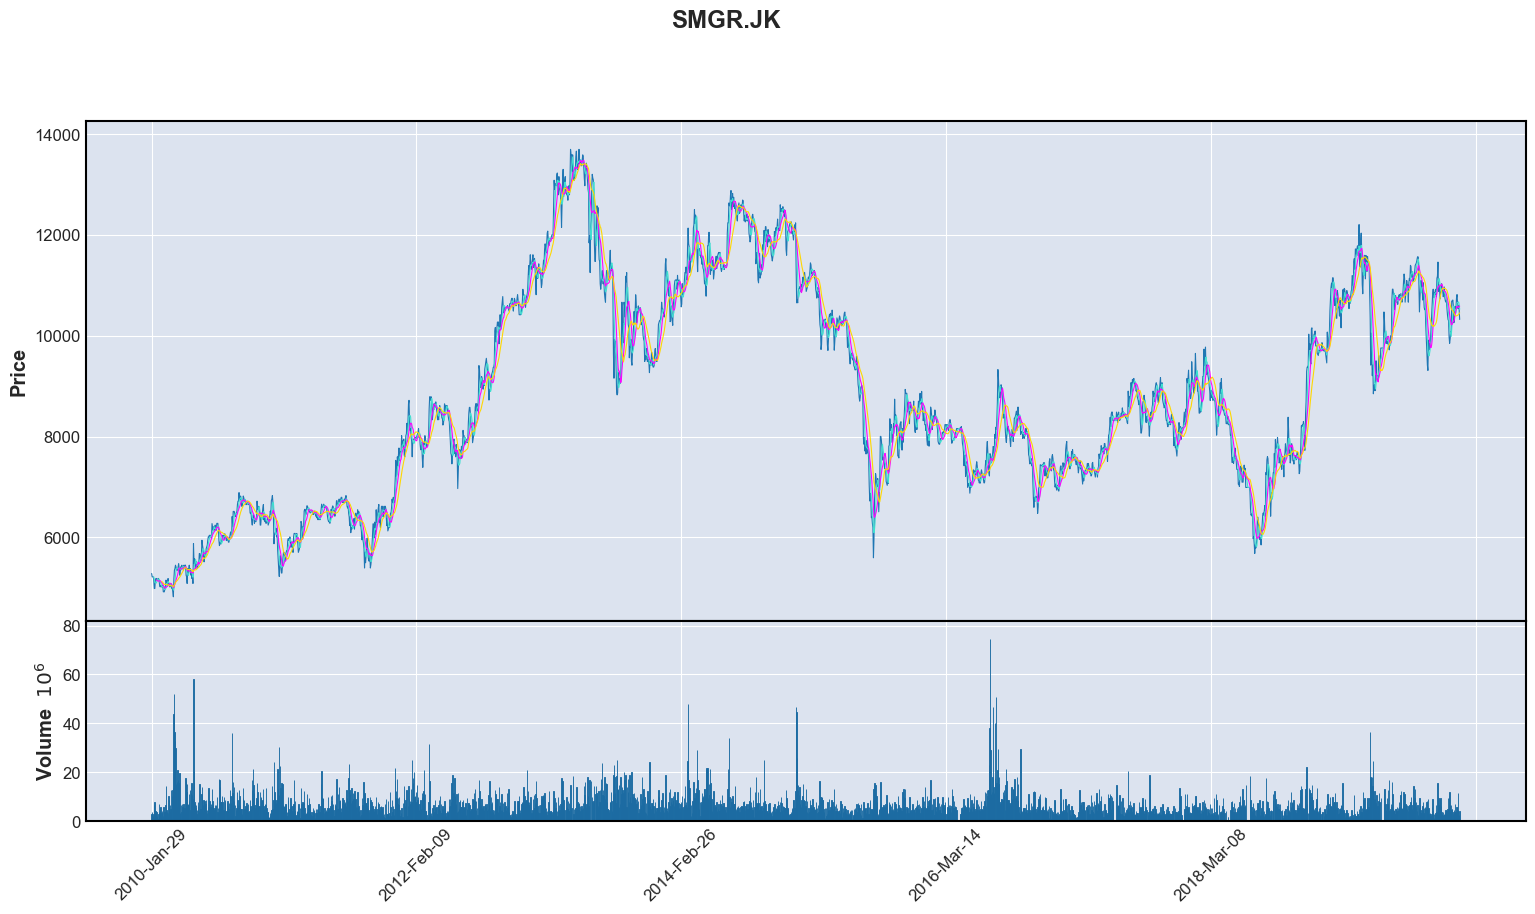


TLKM.JK


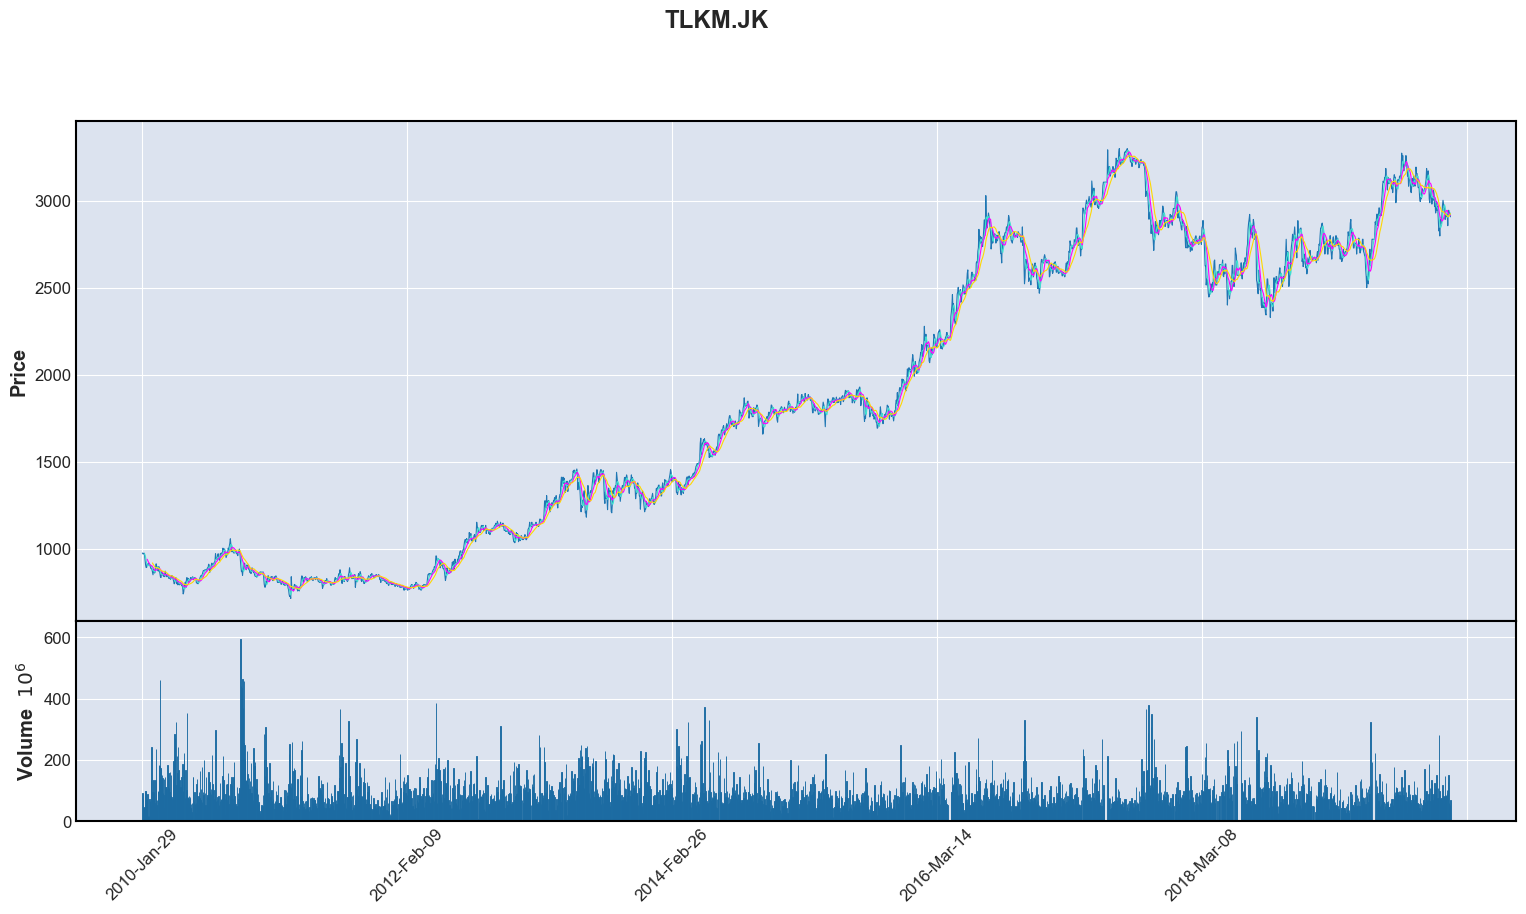


TPIA.JK


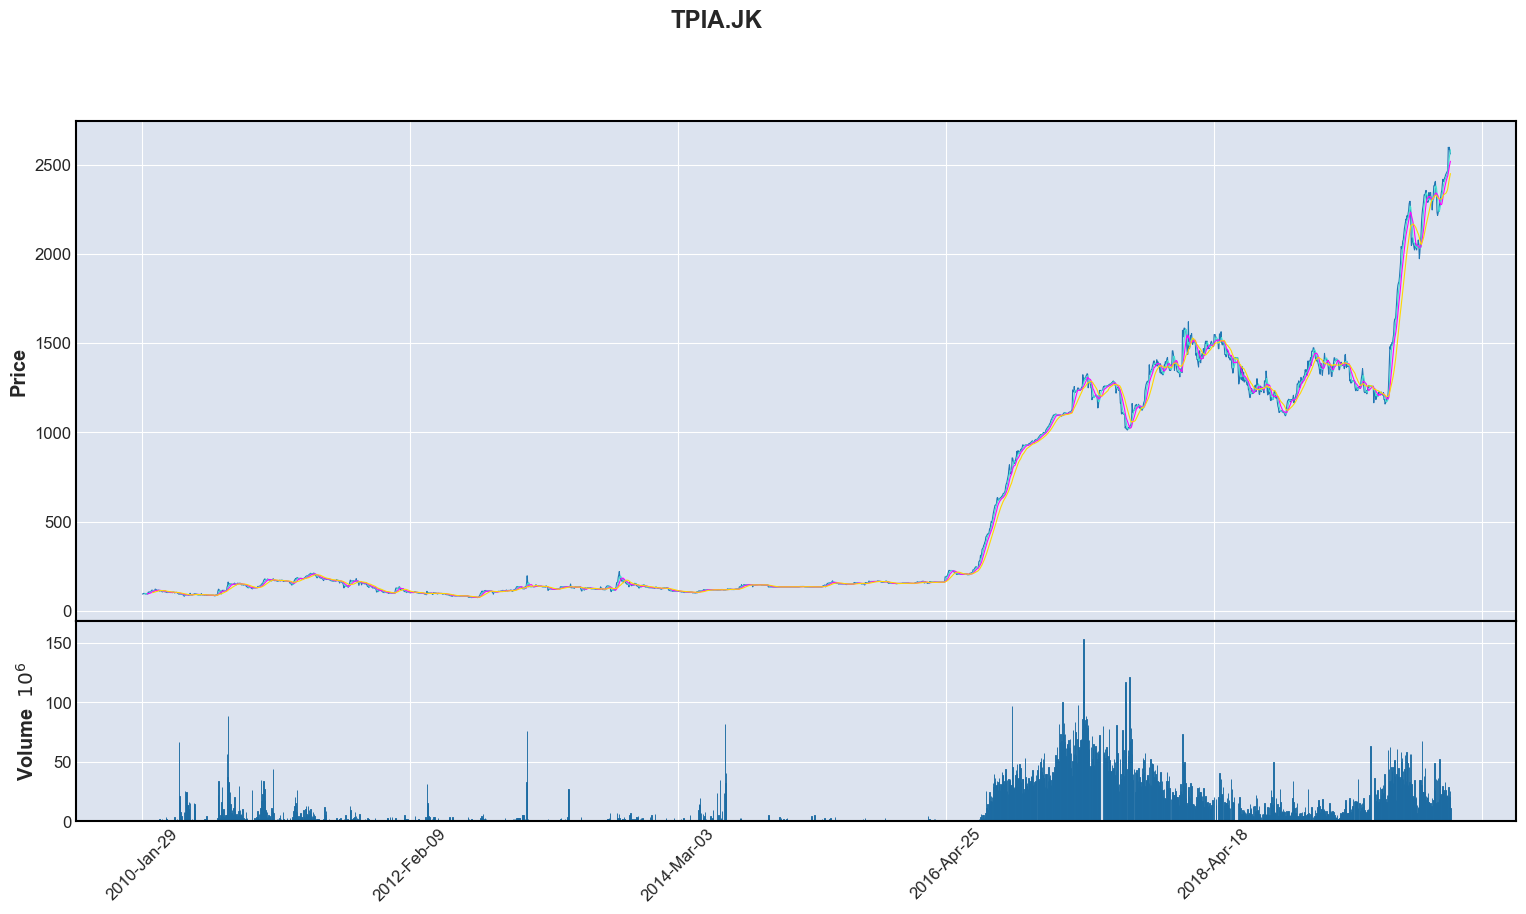


UNTR.JK


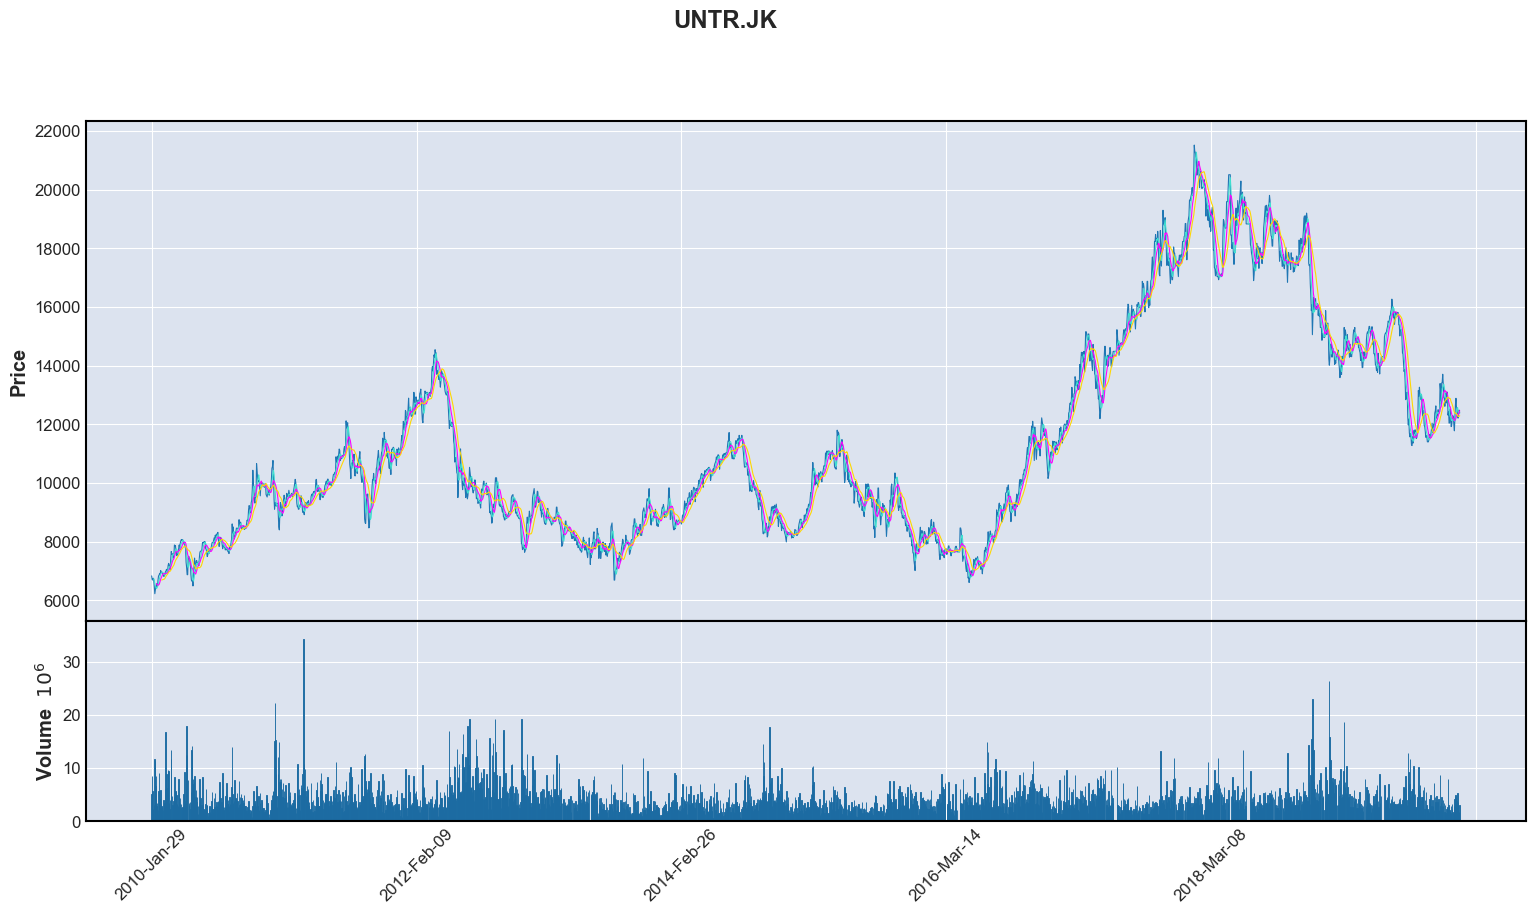


UNVR.JK


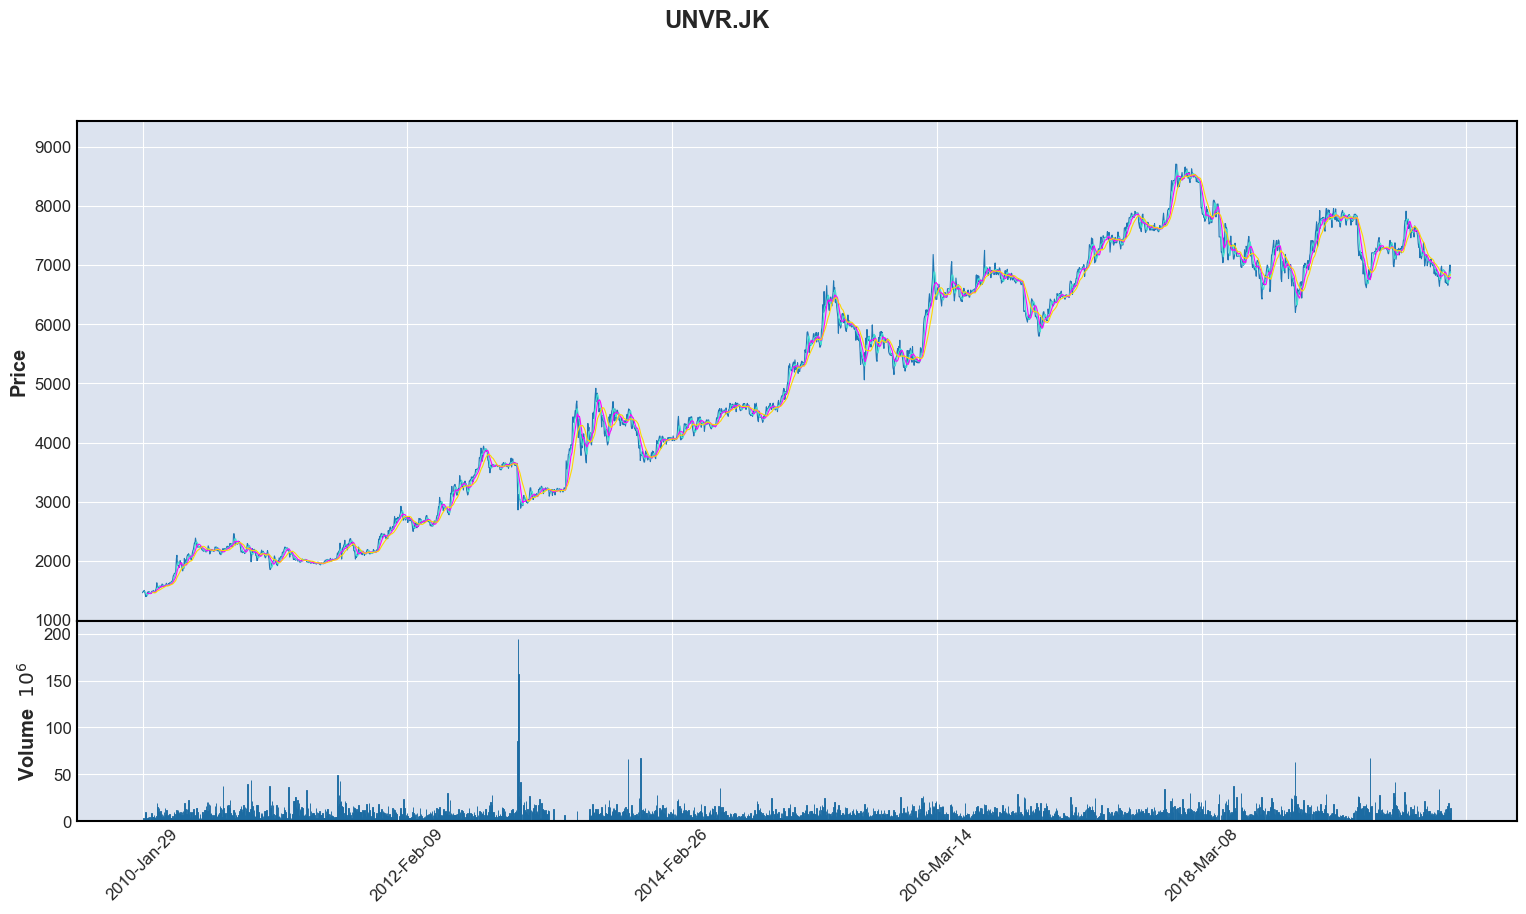


TINS.JK


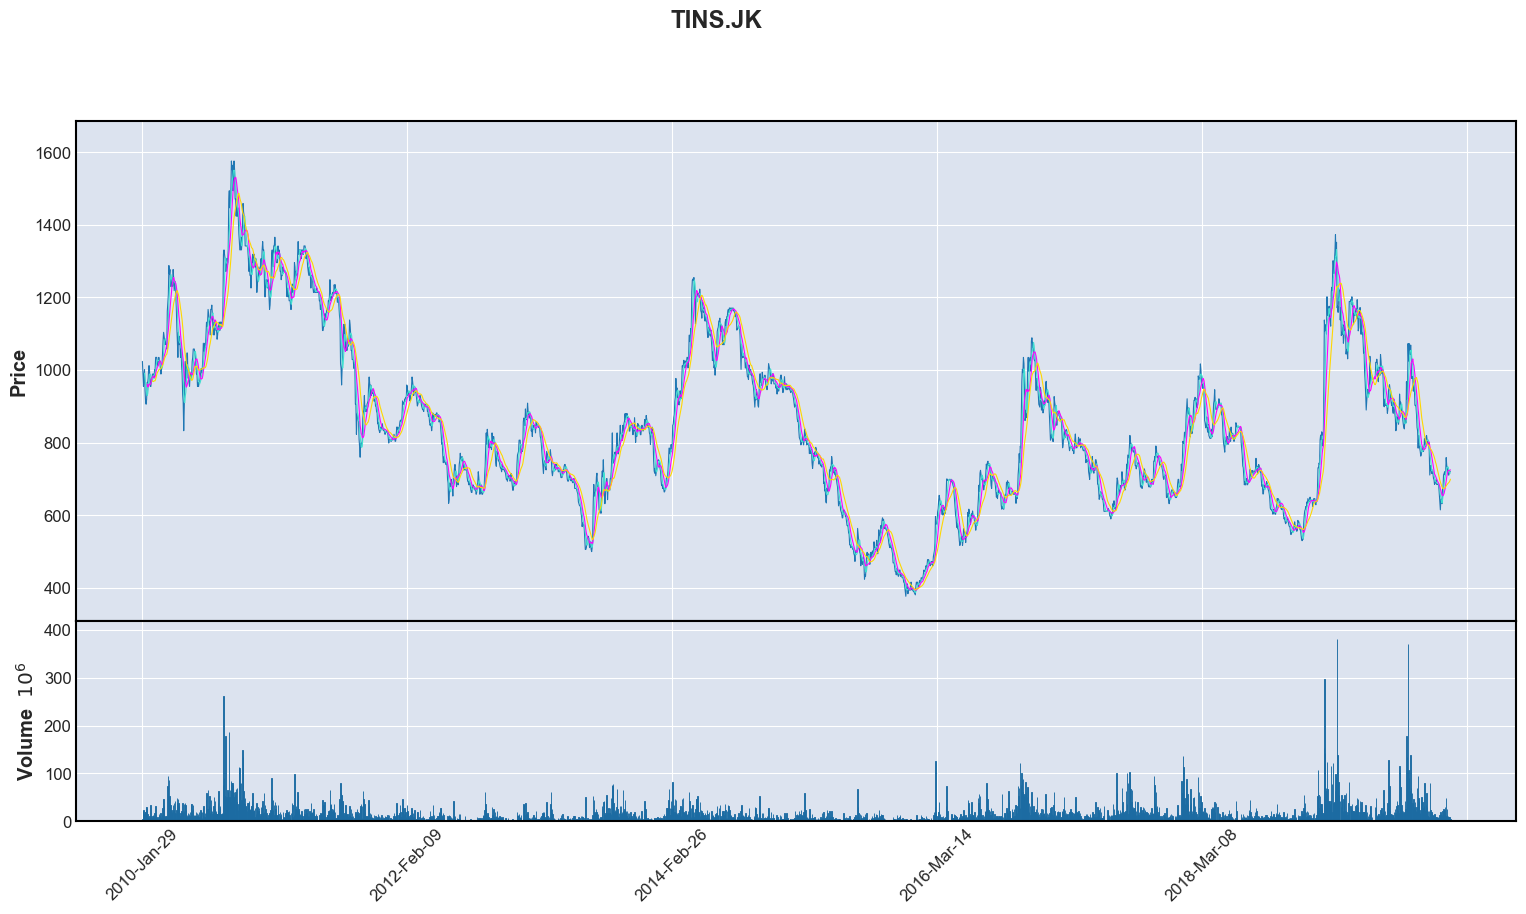


TKIM.JK


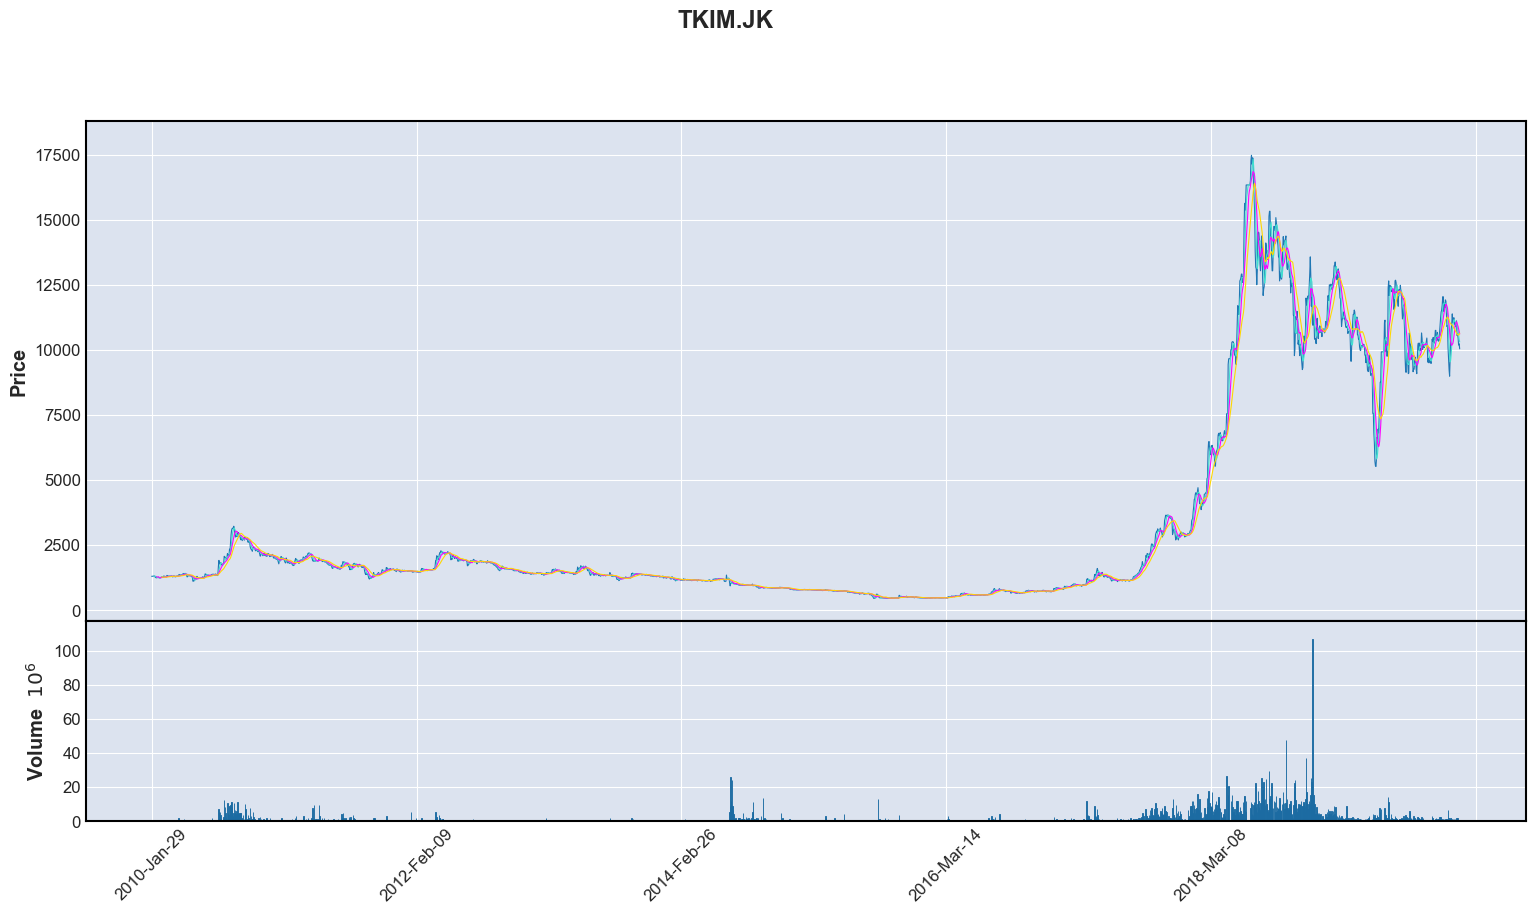

In [142]:
import mplfinance as mpf

for tic in filtered_tickers:
  print(tic)
  mpf.plot(train_df[train_df.ticker == tic].set_index('date'),type='line',mav=(5,10,20),volume=True,figsize=(20,10),title=tic)
  print()

In [6]:
# models/mlp_policy.py

import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import StandardScaler

class MLPPolicy(nn.Module):
    def __init__(self, obs_shape, action_dim, scaler: StandardScaler, hidden_sizes=[128, 128]):
        super().__init__()
        
        # input_dim untuk MLP adalah total semua fitur yang sudah di-flatten
        input_dim = int(np.prod(obs_shape))
        
        # Simpan statistik normalisasi HANYA untuk fitur pasar
        # scaler.mean_ akan memiliki panjang (misal) 14
        obs_mean = torch.tensor(scaler.mean_, dtype=torch.float64)
        obs_std = torch.tensor(scaler.scale_, dtype=torch.float64)
        
        self.register_buffer('obs_mean', obs_mean)
        self.register_buffer('obs_std', obs_std)
        
        layers = []
        last_size = input_dim
        for size in hidden_sizes:
            layers.append(nn.Linear(last_size, size))
            layers.append(nn.ReLU())
            last_size = size
            
        self.feature_extractor = nn.Sequential(*layers)
        self.action_mean = nn.Linear(last_size, action_dim)
        self.log_std = nn.Parameter(torch.zeros(action_dim, dtype=torch.float64))
        self.value_head = nn.Linear(last_size, 1)

    def forward(self, obs):
        batch_size = obs.shape[0]
        # --- REVISI UTAMA DI SINI ---
        
        # Flatten observasi untuk memisahkan fitur
        # Shape: (batch * window * assets, total_features)
        obs_flat = obs.reshape(-1, obs.shape[-1])
        # 1. Pisahkan fitur pasar (misal: 14 fitur pertama) dari fitur non-pasar (misal: 1 fitur terakhir)
        market_features = obs_flat[:, :]
        
        # 2. Normalisasi HANYA fitur pasar
        normalized_market_features = (market_features - self.obs_mean) / (self.obs_std + 1e-8)
        # 3. Gabungkan kembali fitur yang sudah dinormalisasi dengan fitur yang tidak dinormalisasi
        #processed_obs_flat = torch.cat((normalized_market_features, portfolio_weight_feature), dim=1)
        
        # Kembalikan ke shape 4D aslinya
        processed_obs = normalized_market_features.reshape(obs.shape)
        
        # --- SELESAI REVISI NORMALISASI ---

        # Flatten semua dimensi untuk masuk ke MLP
        x = processed_obs.reshape(batch_size, -1)
        
        # Sisa dari forward pass tetap sama
        x = self.feature_extractor(x)
        action_mean = self.action_mean(x)
        action_std = self.log_std.exp()
        value = self.value_head(x)

        return action_mean, action_std, value.squeeze(-1)

In [79]:
import numpy as np
import pandas as pd
import gymnasium as gym # <--- Menggunakan Gymnasium standar baru
from gymnasium import spaces
# from utils.metrics import compute_deflated_sharpe_ratio # Opsional

class BaselineTradingEnv(gym.Env):
    metadata = {'render.modes': ['human']}
    def __init__(
        self,
        df,
        tickers,
        window_size=30,
        initial_cash=1e6,
        transaction_cost_pct=0.001
    ):
        super().__init__()

        self.df = df.copy()
        self.tickers = tickers
        self.window_size = window_size
        self.initial_cash = np.float64(initial_cash)
        self.transaction_cost_pct = transaction_cost_pct
        self.num_assets = len(tickers)
        self.asset_returns = []

        # <--- REVISI 1: Tambahkan 1 fitur baru untuk "bobot portfolio saat ini" ---
        # Jumlah fitur pasar (harga, volume, dll.)
        market_feature_dim = df.shape[1] - 2 
        # Tambahkan 1 fitur untuk bobot portfolio
        self.total_feature_dim = market_feature_dim

        self.action_space = spaces.Box(low=0, high=1, shape=(self.num_assets,), dtype=np.float64)

        # Definisikan observation space dengan dimensi fitur yang baru
        self.observation_space = spaces.Box(
            low=-np.inf,
            high=np.inf,
            shape=(self.window_size, self.num_assets, self.total_feature_dim),
            dtype=np.float64
        )
        self.reset()

    def reset(self, *, seed=None, options=None):
        super().reset(seed=seed) # <--- API Gymnasium baru
        self.current_step = self.window_size
        self.cash = self.initial_cash
        self.asset_holdings = np.zeros(self.num_assets, dtype=np.float64)
        self.done = False
        self.asset_returns = []

        obs = self._get_observation()
        info = {}
        return obs, info

    def _get_observation(self):
        # 1. Dapatkan data pasar seperti biasa
        market_obs_list = []
        for ticker in self.tickers:
            data = self.df[self.df['ticker'] == ticker].iloc[self.current_step - self.window_size:self.current_step]
            market_obs_list.append(data.drop(columns=["date", "ticker"]).values)
        market_obs = np.stack(market_obs_list, axis=1).astype(np.float64)

        # <--- REVISI 2: Hitung bobot portfolio saat ini dan tambahkan ke observasi ---
        # Hitung nilai portfolio total saat ini
        current_prices = self._get_prices(self.current_step)
        asset_values = self.asset_holdings * np.nan_to_num(current_prices)
        portfolio_value = self.cash + np.sum(asset_values)
        
        # Hitung bobot (cegah pembagian dengan nol jika portfolio value adalah 0)
        if portfolio_value > 1e-8:
            current_weights = asset_values / portfolio_value
        else:
            current_weights = np.zeros(self.num_assets)
            
        # Ubah shape bobot agar bisa digabungkan dengan observasi pasar
        # Shape bobot: (num_assets,) -> (1, num_assets, 1)
        # Lalu di-broadcast menjadi (window_size, num_assets, 1)
        weights_obs = np.broadcast_to(
            current_weights.reshape(1, self.num_assets, 1),
            (self.window_size, self.num_assets, 1)
        )

        # Gabungkan observasi pasar dengan observasi bobot
        # Hasilnya akan memiliki shape (window_size, num_assets, total_feature_dim)
        #full_obs = np.concatenate((market_obs, weights_obs), axis=2)
        
        return market_obs #full_obs

    def _get_prices(self, step):
        prices = []
        for ticker in self.tickers:
            try:
                price = self.df[self.df['ticker'] == ticker].iloc[step]['close']
            except IndexError:
                price = np.nan
            prices.append(price)
        return np.array(prices, dtype=np.float64)

    def step(self, actions):
        # ==============================================================================
        # [DEBUG] HEADER - Menandai awal dari satu panggilan 'step'
        # print(f"\n{'='*25} [DEBUG] Inside env.step() at step: {self.current_step} {'='*25}")
        # print(f"[DEBUG] KAS AWAL: Rp {self.cash:,.2f} | HOLDINGS AWAL (lembar): {self.asset_holdings}")
        # print(f"[DEBUG] Aksi mentah dari Agen (Target Bobot Baru): {actions}")
        # ==============================================================================

        if self.done:
            raise RuntimeError("Episode has ended. Please call reset() to start a new episode.")

        # --- LANGKAH 1: SETUP ---
        target_weights = actions / (np.sum(actions) + 1e-8)
        current_prices = self._get_prices(self.current_step)
        if np.isnan(current_prices).any():
            self.done = True; return self._get_observation(), -1.0, True, False, {'portfolio_value': self.cash}
        
        # --- LANGKAH 2: HITUNG KEADAAN PORTFOLIO SAAT INI ---
        current_asset_values = self.asset_holdings * current_prices
        portfolio_value_before_trade = self.cash + np.sum(current_asset_values)
        
        current_weights = np.zeros(self.num_assets)
        if portfolio_value_before_trade > 1e-8:
            current_weights = current_asset_values / portfolio_value_before_trade

        # print("\n--- LANGKAH 2: KEADAAN PORTFOLIO SAAT INI ---")
        # print(f"Harga Aset Hari Ini (Rp): {current_prices}")
        # print(f"Nilai Total Portfolio (Rp): {portfolio_value_before_trade:,.2f}")
        # print(f"Bobot Portfolio Saat Ini (%): {current_weights}")

        # --- LANGKAH 3: BUAT RENCANA PERDAGANGAN ---
        weight_diff = target_weights - current_weights
        trade_value = weight_diff * portfolio_value_before_trade
        # Nilai positif berarti "target beli", negatif berarti "target jual"

        # print("\n--- LANGKAH 3: BUAT RENCANA PERDAGANGAN ---")
        # print(f"Target Bobot Baru (%): {target_weights}")
        # print(f"Selisih Bobot (%): {weight_diff}")
        # print(f"Rencana Nilai Perdagangan (Rp): {trade_value}")

        # --- LANGKAH 4: EKSEKUSI PENJUALAN (SELL) ---
        # print("\n--- LANGKAH 4: EKSEKUSI PENJUALAN (SELL) ---")
        has_sold = False
        for i in range(self.num_assets):
            if trade_value[i] < 0:
                has_sold = True
                value_to_sell = -trade_value[i]
                shares_to_sell_float = value_to_sell / (current_prices[i] + 1e-8)
                shares_to_sell_int = np.floor(shares_to_sell_float)
                shares_to_sell_int = min(shares_to_sell_int, self.asset_holdings[i])

                if shares_to_sell_int > 0:
                    actual_sold_value = shares_to_sell_int * current_prices[i]
                    cash_from_sale = actual_sold_value * (1 - self.transaction_cost_pct)
                    # print(f"  Aset-{i}: Jual {shares_to_sell_int} lembar senilai Rp {actual_sold_value:,.2f}")
                    self.asset_holdings[i] -= shares_to_sell_int
                    self.cash += cash_from_sale
                    # print(f"    -> Kas setelah penjualan: Rp {self.cash:,.2f}")
        # if not has_sold:
        #     print("  Tidak ada aset yang dijual.")

        # --- LANGKAH 5: EKSEKUSI PEMBELIAN (BUY) ---
        # print("\n--- LANGKAH 5: EKSEKUSI PEMBELIAN (BUY) ---")
        has_bought = False
        for i in range(self.num_assets):
            if trade_value[i] > 0:
                has_bought = True
                value_to_buy_target = trade_value[i]
                
                # Hitung berapa lembar yang bisa dibeli dengan sisa kas
                spendable_cash = self.cash / (1 + self.transaction_cost_pct)
                shares_buyable = np.floor(spendable_cash / (current_prices[i] + 1e-8))
                shares_target_to_buy = np.floor(value_to_buy_target / (current_prices[i] + 1e-8))
                shares_to_buy = min(shares_target_to_buy, shares_buyable)

                if shares_to_buy > 0:
                    actual_buy_value = shares_to_buy * current_prices[i]
                    total_cost = actual_buy_value * (1 + self.transaction_cost_pct)
                    # print(f"  Aset-{i}: Beli {shares_to_buy} lembar (Total biaya: Rp {total_cost:,.2f})")
                    self.asset_holdings[i] += shares_to_buy
                    self.cash -= total_cost
                    # print(f"    -> Sisa kas: Rp {self.cash:,.2f}")
        # if not has_bought:
        #     print("  Tidak ada aset yang dibeli.")
        
        # --- LANGKAH 6 & 7: TUTUP BUKU & HITUNG HASIL ---
        self.current_step += 1
        if self.current_step >= len(self.df) // self.num_assets: self.done = True
        
        next_prices = self._get_prices(self.current_step)
        if self.done: next_prices = current_prices
        
        portfolio_value_after_trade = self.cash + np.sum(self.asset_holdings * np.nan_to_num(next_prices))
        reward = (portfolio_value_after_trade - portfolio_value_before_trade) / (portfolio_value_before_trade + 1e-8)

        # print("\n--- LANGKAH 6 & 7: HASIL AKHIR ---")
        # print(f"Harga Penutupan Besok: {next_prices}")
        # print(f"KAS AKHIR: Rp {self.cash:,.2f} | HOLDINGS AKHIR (lembar): {self.asset_holdings}")
        # print(f"Nilai Total Portfolio SETELAH trade (berdasarkan harga besok): Rp {portfolio_value_after_trade:,.2f}")
        # print(f"Reward untuk step ini: {reward:.6f}")
        # print(f"{'='*28} [END DEBUG] Step: {self.current_step-1} {'='*28}")

        if np.isnan(reward) or not np.isfinite(reward):
            reward = -1.0; self.done = True
        
        self.asset_returns.append(reward)
        obs = self._get_observation()
        info = {'portfolio_value': portfolio_value_after_trade}

        terminated, truncated = self.done, False
        return obs, reward, terminated, truncated, info

In [143]:
from agents.ppo import PPO
#from agents.ppo_batch import PPO
from models.mlp_policy import MLPPolicy
#from models.dummy_policy import MLPPolicy
from envs.baseline_trading_env import BaselineTradingEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import DummyVecEnv
from sklearn.preprocessing import StandardScaler
#from c_ppo import PPO
#from c_baseline_trading_env import BaselineTradingEnv
import torch

env = BaselineTradingEnv(train_df, tickers, initial_cash=1e8)
# env = make_vec_env(
#     BaselineTradingEnv, 
#     n_envs=4, 
#     env_kwargs=dict(df=df, tickers=tickers)
# )
# env = DummyVecEnv([lambda: BaselineTradingEnv(df=df, tickers=tickers) for _ in range(4)])
# Ganti ini dengan daftar kolom fitur Anda
feature_cols = df.columns.drop(['date','ticker'])

scaler = StandardScaler()
scaler.fit(train_df[feature_cols]) 

policy = MLPPolicy(
    env.observation_space.shape, 
    env.action_space.shape[0],
    scaler=scaler
    ).double()  # continuous action_dim = num_assets
ppo_agent = PPO(policy, env, lr=3e-4, n_steps=1024, device='cuda' if torch.cuda.is_available() else 'cpu')
ppo_agent.train(total_timesteps=200000)


--------------------------------------------------
| time/                                          |
|    fps                  |                    4 |
|    iterations           |                    3 |
|    time_elapsed         |                  735 |
|    total_timesteps      |                 3072 |
| train/                                         |
|    loss                 |             -0.50145 |
|    policy_gradient_loss |             -0.47791 |
|    value_loss           |              0.00989 |
|    entropy_loss         |             -5.69853 |
|    approx_kl            |             -0.99858 |
|    clip_fraction        |              0.84375 |
|    explained_variance   |             -0.00925 |
|    std                  |              1.00573 |
|    learning_rate        |          2.98462e-04 |
|    clip_range           |              0.20000 |
|    n_updates            |                    3 |
| rollout/                                       |
|    ep_len_mean          |    

KeyboardInterrupt: 

In [81]:
torch.save(ppo_agent.policy.state_dict(), 'trained_policy/ppo_trading_policy.pth')

In [10]:
import torch
import numpy as np
# Pastikan Anda mengimpor semua kelas yang diperlukan
from models.mlp_policy import MLPPolicy
from agents.ppo import PPO
from envs.baseline_trading_env import BaselineTradingEnv 
# Asumsikan Anda menggunakan env untuk mendapatkan observation/action space
# Atau Anda bisa mendefinisikannya secara manual jika Anda tahu shape-nya

# --- 1. Inisialisasi Ulang Arsitektur ---

# Dapatkan observation dan action space (misalnya, dengan membuat env dummy)
# Ganti argumen ini sesuai dengan data Anda
dummy_env = BaselineTradingEnv(df=df, tickers=tickers)
obs_shape = dummy_env.observation_space.shape
action_dim = dummy_env.action_space.shape[0]

# Buat objek policy dengan arsitektur yang sama
# Pastikan untuk memindahkannya ke .double() dan device yang benar
device = 'cuda' if torch.cuda.is_available() else 'cpu'
loaded_policy = MLPPolicy(obs_shape, action_dim).double().to(device)

print(f"Model diinisialisasi dengan bobot acak.")

# --- 2. Muat Bobot yang Disimpan ---

# Tentukan path ke file .pth Anda
model_path = 'trained_policy/ppo_trading_policy.pth'

# Muat state_dict dari file
loaded_policy.load_state_dict(torch.load(model_path))

print(f"Bobot dari {model_path} berhasil dimuat ke dalam model.")

# --- 3. Set ke Mode Evaluasi ---
loaded_policy.eval()

print("Model sekarang dalam mode evaluasi dan siap digunakan.")


# --- Contoh Penggunaan untuk Prediksi ---

# Dapatkan satu observasi dari lingkungan
# (Anda harus me-reset env baru untuk mendapatkan state awal)
observation = dummy_env.reset()

# Ubah observasi menjadi tensor yang sesuai
obs_tensor = torch.tensor(observation, dtype=torch.float64).to(device).unsqueeze(0)

# Gunakan model untuk mendapatkan aksi secara deterministik (ambil mean-nya)
with torch.no_grad():
    action_mean, _, _ = loaded_policy(obs_tensor)

# Aksi yang akan diambil adalah output mean dari kebijakan
deterministic_action = action_mean.squeeze(0).cpu().numpy()

print(f"\nContoh observasi shape: {observation.shape}")
print(f"Aksi yang dihasilkan oleh model: {deterministic_action}")

Model diinisialisasi dengan bobot acak.
Bobot dari trained_policy/ppo_trading_policy.pth berhasil dimuat ke dalam model.
Model sekarang dalam mode evaluasi dan siap digunakan.

Contoh observasi shape: (30, 2, 14)
Aksi yang dihasilkan oleh model: [0.52014258 0.20835692]


In [82]:
#test_df = df[df['date'] >= '2020-01-01']

# Buat lingkungan BARU khusus untuk data uji
# Gunakan initial_cash yang Anda inginkan
test_env = BaselineTradingEnv(
    df=test_df, 
    tickers=tickers,
    initial_cash=1e8 # Sesuai permintaan Anda, 100 juta
)

In [83]:
import torch
from models.mlp_policy import MLPPolicy # Pastikan impor ini benar

# Tentukan arsitektur dan device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
obs_shape = test_env.observation_space.shape
action_dim = test_env.action_space.shape[0]

# Buat objek policy dengan arsitektur yang sama
loaded_policy = MLPPolicy(obs_shape, action_dim, scaler).double().to(device)

# Muat bobot yang sudah disimpan
model_path = 'trained_policy/ppo_trading_policy.pth'
loaded_policy.load_state_dict(torch.load(model_path))

# Set ke mode evaluasi (sangat penting!)
loaded_policy.eval()

print("Model berhasil dimuat dan siap untuk backtesting.")

Model berhasil dimuat dan siap untuk backtesting.


In [86]:
# List untuk menyimpan riwayat nilai portfolio
portfolio_history = []

# Reset lingkungan uji dan dapatkan observasi awal
# Gunakan API Gymnasium yang baru
obs, info = test_env.reset() 

# Catat nilai portfolio awal
initial_portfolio_value = test_env.cash
portfolio_history.append(initial_portfolio_value)

# Loop sampai episode selesai
terminated = False
truncated = False

while not (terminated or truncated):
    # Ubah observasi menjadi tensor
    obs_tensor = torch.tensor(obs, dtype=torch.float64).to(device).unsqueeze(0)

    # Dapatkan aksi deterministik dari model (tanpa gradien)
    with torch.no_grad():
        action_mean, _, _ = loaded_policy(obs_tensor)
    
    # Ambil aksi sebagai array numpy
    action = action_mean.squeeze(0).cpu().numpy()

    # Lakukan langkah di lingkungan
    obs, reward, terminated, truncated, info = test_env.step(action)
    
    # Ambil dan catat nilai portfolio dari dictionary 'info'
    current_portfolio_value = info['portfolio_value']
    portfolio_history.append(current_portfolio_value)

print(f"Backtesting selesai.")
print(f"Nilai Portfolio Awal: Rp {initial_portfolio_value:,.2f}")
print(f"Nilai Portfolio Akhir: Rp {portfolio_history[-1]:,.2f}")

Backtesting selesai.
Nilai Portfolio Awal: Rp 100,000,000.00
Nilai Portfolio Akhir: Rp 162,061,562.77


In [91]:
import numpy as np

def calculate_cumulative_returns(portfolio_history):
    """
    Menghitung cumulative return dari sebuah list atau array nilai portfolio.

    Args:
        portfolio_history (list or np.ndarray): Riwayat nilai portfolio dari waktu ke waktu.

    Returns:
        np.ndarray: Sebuah array berisi cumulative return di setiap langkah.
                    Hasilnya dalam bentuk desimal (misal, 0.10 untuk 10%).
    """
    # Pastikan input adalah array NumPy untuk operasi vektor
    values = np.array(portfolio_history, dtype=np.float64)
    
    # Cek kasus-kasus khusus untuk menghindari error
    if len(values) < 2:
        return np.array([0.0] * len(values)) # Tidak ada return jika tidak ada pergerakan
        
    initial_value = values[0]
    if initial_value == 0:
        return np.array([0.0] * len(values)) # Hindari pembagian dengan nol

    # Kalkulasi cumulative return secara vektorisasi (sangat cepat)
    # Rumus: (Nilai Saat Ini - Nilai Awal) / Nilai Awal
    cumulative_returns = ((values - initial_value) / initial_value) + 1
    
    return cumulative_returns

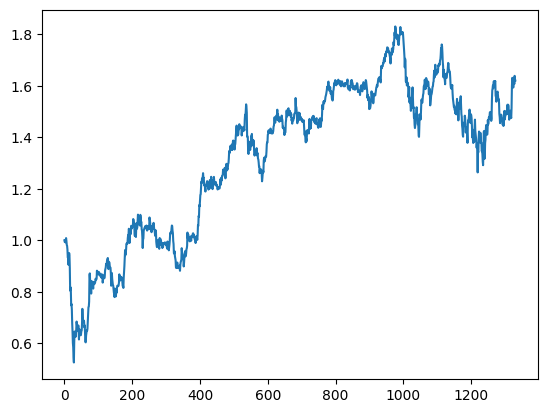

In [93]:
import matplotlib.pyplot as plt

plt.plot(calculate_cumulative_returns(portfolio_history))

In [17]:
dummy_env.tickers

['TLKM.JK', 'BBCA.JK']

| Atribut      | Tipe                        | Arti                                                  |
| ------------ | --------------------------- | ----------------------------------------------------- |
| `x`          | `[num_nodes, num_features]` | Fitur dari setiap ticker (node)                       |
| `edge_index` | `[2, num_edges]`            | Matriks koneksi antar node, misalnya \[\[0,1],\[1,0]] |
| `edge_attr`  | `[num_edges, d]`            | Fitur tiap edge (misal: korelasi)                     |
| `tickers`    | `[num_nodes]`               | Nama atau ID ticker                                   |
| `date`       | `datetime`                  | Timestamp dari snapshot                               |


| Komponen     | Nilai      | Penjelasan                                                       |
| ------------ | ---------- | ---------------------------------------------------------------- |
| `x`          | `[2, 14]`  | Ada 2 node (ticker) dengan 14 fitur masing-masing                |
| `edge_index` | `[2, 2]`   | Ada 2 edge, berbentuk `[2, num_edges]` sesuai PyTorch Geometric  |
| `edge_attr`  | `[2, 1]`   | Setiap edge memiliki 1 nilai fitur (kemungkinan besar: korelasi) |
| `tickers`    | `[2]`      | Dua ticker misalnya: `["TLKM.JK", "BBCA.JK"]`                    |
| `date`       | `datetime` | Snapshot data pada tanggal tersebut                              |


In [ ]:
# df_graph = generate_graph_sequence(df, edge_strategy='fully_connected')

In [ ]:
# # contoh di training loop ppo.py
# from agents.ewc_wrapper import EWCWrapper
# from agents.ewc import EWC
# import models

# # asumsikan kamu sudah punya old_task_dataset (observasi) untuk hitung fisher
# ewc = EWC(models.mlp_policy.MLPPolicy(), old_task_dataset, device=device, lambda_ewc=1000)
# ewc_model = EWCWrapper(models.mlp_policy.MLPPolicy(), ewc, lambda_ewc=1000)

# for epoch in range(num_epochs):
#     for batch in dataloader:
#         policy_loss = ... # hitung loss PPO biasa
#         loss = ewc_model.compute_loss(policy_loss)

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
